In [65]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],
                   columns=["id1", "id2"])
df.corr()
corrDB = [(6525,6525,1),(6526,6526,1),(6527,6527,1),(6528,6528,1),(6529,6529,1),(6530,6530,1),(6531,6531,1),(6532,6532,1),(6533,6533,1),(6534,6534,1),(6535,6535,1),(6536,6536,1),(6537,6537,1),(6538,6538,1),(6539,6539,1),(6540,6540,1),(6541,6541,1),(6542,6542,1),(6543,6543,1),(6544,6544,1),(6545,6545,1),(6546,6546,1),(6547,6547,1),(6548,6548,1),(6549,6549,1),(6550,6550,1),(6551,6551,1),(6552,6552,1),(6553,6553,1),(6554,6554,1),(6555,6555,1),(6556,6556,1),(6557,6557,1),(6558,6558,1),(6559,6559,1),(6560,6560,1),(6561,6561,1),(6562,6562,1),(6563,6563,1),(6564,6564,1),(6564,7067,-1),(6565,6565,1),(6566,6566,1),(6567,6567,1),(6568,6568,1),(6569,6569,1),(6570,6570,1),(6571,6571,1),(6572,6572,1),(6573,6573,1),(6574,6574,1),(6575,6575,1),(6576,6576,1),(6577,6577,1),(6578,6578,1),(6579,6579,1),(6580,6580,1),(6581,6581,1),(6582,6582,1),(6583,6583,1),(6584,6584,1),(6585,6585,1),(6586,6586,1),(6587,6587,1),(6588,6588,1),(6589,6589,1),(6590,6590,1),(6591,6591,1),(6592,6592,1),(6593,6593,1),(6594,6594,1),(6595,6595,1),(6596,6596,1),(6597,6597,1),(6598,6598,1),(6599,6599,1),(6600,6600,1),(6601,6601,1),(6602,6602,1),(6603,6603,1),(6604,6604,1),(6605,6605,1),(6606,6606,1),(6607,6607,1),(6608,6608,1),(6609,6609,1),(6610,6610,1),(6611,6611,1),(6612,6612,1),(6613,6613,1),(6614,6614,1),(6615,6615,1),(6616,6616,1),(6617,6617,1),(6618,6618,1),(6619,6619,1),(6620,6620,1),(6621,6621,1),(6622,6622,1),(6623,6623,1),(6624,6624,1),(6625,6625,1),(6626,6626,1),(6627,6627,1),(6628,6628,1),(6629,6629,1),(6630,6630,1),(6631,6631,1),(6632,6632,1),(6633,6633,1),(6634,6634,1),(6635,6635,1),(6636,6636,1),(6637,6637,1),(6638,6638,1),(6639,6639,1),(6640,6640,1),(6641,6641,1),(6642,6642,1),(6643,6643,1),(6644,6644,1),(6645,6645,1),(6646,6646,1),(6647,6647,1),(6648,6648,1),(6649,6649,1),(6650,6650,1),(6650,6733,1),(6651,6651,1),(6652,6652,1),(6653,6653,1),(6654,6654,1),(6655,6655,1),(6656,6656,1),(6657,6657,1),(6658,6658,1),(6659,6659,1),(6660,6660,1),(6661,6661,1),(6662,6662,1),(6663,6663,1),(6664,6664,1),(6665,6665,1),(6666,6666,1),(6667,6667,1),(6668,6668,1),(6669,6669,1),(6670,6670,1),(6671,6671,1),(6672,6672,1),(6673,6673,1),(6674,6674,1),(6675,6675,1),(6676,6676,1),(6677,6677,1),(6678,6678,1),(6679,6679,1),(6680,6680,1),(6681,6681,1),(6682,6682,1),(6683,6683,1),(6684,6684,1),(6685,6685,1),(6686,6686,1),(6687,6687,1),(6688,6688,1),(6689,6689,1),(6690,6690,1),(6691,6691,1),(6692,6692,1),(6693,6693,1),(6694,6694,1),(6695,6695,1),(6696,6696,1),(6697,6697,1),(6698,6698,1),(6699,6699,1),(6700,6700,1),(6701,6701,1),(6702,6702,1),(6703,6703,1),(6704,6704,1),(6705,6705,1),(6706,6706,1),(6707,6707,1),(6708,6708,1),(6709,6709,1),(6710,6710,1),(6711,6711,1),(6712,6712,1),(6713,6713,1),(6714,6714,1),(6715,6715,1),(6716,6716,1),(6717,6717,1),(6718,6718,1),(6719,6719,1),(6720,6720,1),(6721,6721,1),(6722,6722,1),(6723,6723,1),(6724,6724,1),(6725,6725,1),(6726,6726,1),(6727,6727,1),(6728,6728,1),(6729,6729,1),(6730,6730,1),(6730,7098,1),(6731,6731,1),(6732,6732,1),(6733,6650,1),(6733,6733,1),(6734,6734,1),(6735,6735,1),(6736,6736,1),(6737,6737,1),(6738,6738,1),(6739,6739,1),(6740,6740,1),(6741,6741,1),(6742,6742,1),(6743,6743,1),(6744,6744,1),(6745,6745,1),(6746,6746,1),(6747,6747,1),(6748,6748,1),(6749,6749,1),(6750,6750,1),(6751,6751,1),(6752,6752,1),(6753,6753,1),(6754,6754,1),(6755,6755,1),(6756,6756,1),(6757,6757,1),(6758,6758,1),(6759,6759,1),(6760,6760,1),(6761,6761,1),(6762,6762,1),(6763,6763,1),(6764,6764,1),(6765,6765,1),(6766,6766,1),(6767,6767,1),(6768,6768,1),(6769,6769,1),(6770,6770,1),(6771,6771,1),(6772,6772,1),(6773,6773,1),(6774,6774,1),(6775,6775,1),(6776,6776,1),(6777,6777,1),(6778,6778,1),(6779,6779,1),(6780,6780,1),(6781,6781,1),(6782,6782,1),(6783,6783,1),(6784,6784,1),(6785,6785,1),(6786,6786,1),(6787,6787,1),(6788,6788,1),(6789,6789,1),(6790,6790,1),(6791,6791,1),(6792,6792,1),(6793,6793,1),(6794,6794,1),(6795,6795,1),(6796,6796,1),(6797,6797,1),(6798,6798,1),(6799,6799,1),(6800,6800,1),(6801,6801,1),(6802,6802,1),(6803,6803,1),(6804,6804,1),(6805,6805,1),(6806,6806,1),(6807,6807,1),(6808,6808,1),(6809,6809,1),(6810,6810,1),(6811,6811,1),(6812,6812,1),(6813,6813,1),(6814,6814,1),(6815,6815,1),(6816,6816,1),(6817,6817,1),(6818,6818,1),(6819,6819,1),(6820,6820,1),(6821,6821,1),(6822,6822,1),(6823,6823,1),(6824,6824,1),(6825,6825,1),(6826,6826,1),(6827,6827,1),(6828,6828,1),(6829,6829,1),(6830,6830,1),(6831,6831,1),(6832,6832,1),(6833,6833,1),(6834,6834,1),(6835,6835,1),(6836,6836,1),(6837,6837,1),(6838,6838,1),(6839,6839,1),(6840,6840,1),(6841,6841,1),(6842,6842,1),(6843,6843,1),(6844,6844,1),(6845,6845,1),(6846,6846,1),(6847,6847,1),(6848,6848,1),(6849,6849,1),(6850,6850,1),(6851,6851,1),(6852,6852,1),(6853,6853,1),(6854,6854,1),(6855,6855,1),(6856,6856,1),(6857,6857,1),(6858,6858,1),(6859,6859,1),(6860,6860,1),(6861,6861,1),(6862,6862,1),(6863,6863,1),(6864,6864,1),(6865,6865,1),(6866,6866,1),(6867,6867,1),(6868,6868,1),(6869,6869,1),(6870,6870,1),(6871,6871,1),(6872,6872,1),(6873,6873,1),(6874,6874,1),(6875,6875,1),(6876,6876,1),(6877,6877,1),(6878,6878,1),(6879,6879,1),(6880,6880,1),(6881,6881,1),(6882,6882,1),(6883,6883,1),(6884,6884,1),(6885,6885,1),(6886,6886,1),(6887,6887,1),(6888,6888,1),(6889,6889,1),(6890,6890,1),(6891,6891,1),(6892,6892,1),(6893,6893,1),(6894,6894,1),(6895,6895,1),(6896,6896,1),(6897,6897,1),(6898,6898,1),(6899,6899,1),(6900,6900,1),(6901,6901,1),(6902,6902,1),(6903,6903,1),(6904,6904,1),(6905,6905,1),(6906,6906,1),(6907,6907,1),(6908,6908,1),(6909,6909,1),(6910,6910,1),(6911,6911,1),(6912,6912,1),(6913,6913,1),(6914,6914,1),(6915,6915,1),(6916,6916,1),(6917,6917,1),(6918,6918,1),(6919,6919,1),(6920,6920,1),(6921,6921,1),(6922,6922,1),(6923,6923,1),(6924,6924,1),(6925,6925,1),(6926,6926,1),(6927,6927,1),(6928,6928,1),(6929,6929,1),(6930,6930,1),(6930,7683,-1),(6931,6931,1),(6932,6932,1),(6933,6933,1),(6934,6934,1),(6935,6935,1),(6936,6936,1),(6937,6937,1),(6938,6938,1),(6939,6939,1),(6940,6940,1),(6941,6941,1),(6942,6942,1),(6943,6943,1),(6944,6944,1),(6945,6945,1),(6946,6946,1),(6947,6947,1),(6948,6948,1),(6949,6949,1),(6950,6950,1),(6951,6951,1),(6952,6952,1),(6953,6953,1),(6954,6954,1),(6955,6955,1),(6956,6956,1),(6957,6957,1),(6958,6958,1),(6959,6959,1),(6960,6960,1),(6961,6961,1),(6962,6962,1),(6963,6963,1),(6964,6964,1),(6965,6965,1),(6966,6966,1),(6967,6967,1),(6968,6968,1),(6969,6969,1),(6970,6970,1),(6971,6971,1),(6972,6972,1),(6973,6973,1),(6974,6974,1),(6975,6975,1),(6976,6976,1),(6977,6977,1),(6978,6978,1),(6979,6979,1),(6980,6980,1),(6981,6981,1),(6982,6982,1),(6983,6983,1),(6984,6984,1),(6985,6985,1),(6986,6986,1),(6987,6987,1),(6988,6988,1),(6989,6989,1),(6990,6990,1),(6991,6991,1),(6992,6992,1),(6993,6993,1),(6994,6994,1),(6995,6995,1),(6996,6996,1),(6997,6997,1),(6998,6998,1),(6999,6999,1),(7000,7000,1),(7001,7001,1),(7002,7002,1),(7003,7003,1),(7004,7004,1),(7005,7005,1),(7006,7006,1),(7007,7007,1),(7008,7008,1),(7009,7009,1),(7010,7010,1),(7011,7011,1),(7012,7012,1),(7013,7013,1),(7014,7014,1),(7015,7015,1),(7016,7016,1),(7017,7017,1),(7018,7018,1),(7019,7019,1),(7020,7020,1),(7021,7021,1),(7022,7022,1),(7023,7023,1),(7023,7332,1),(7024,7024,1),(7025,7025,1),(7026,7026,1),(7027,7027,1),(7028,7028,1),(7029,7029,1),(7030,7030,1),(7031,7031,1),(7032,7032,1),(7033,7033,1),(7034,7034,1),(7035,7035,1),(7036,7036,1),(7037,7037,1),(7038,7038,1),(7039,7039,1),(7040,7040,1),(7041,7041,1),(7042,7042,1),(7043,7043,1),(7044,7044,1),(7045,7045,1),(7046,7046,1),(7047,7047,1),(7048,7048,1),(7049,7049,1),(7050,7050,1),(7051,7051,1),(7052,7052,1),(7053,7053,1),(7054,7054,1),(7055,7055,1),(7056,7056,1),(7057,7057,1),(7058,7058,1),(7059,7059,1),(7060,7060,1),(7061,7061,1),(7062,7062,1),(7063,7063,1),(7064,7064,1),(7065,7065,1),(7066,7066,1),(7067,6564,-1),(7067,7067,1),(7068,7068,1),(7069,7069,1),(7070,7070,1),(7071,7071,1),(7072,7072,1),(7073,7073,1),(7074,7074,1),(7075,7075,1),(7076,7076,1),(7077,7077,1),(7078,7078,1),(7079,7079,1),(7080,7080,1),(7081,7081,1),(7082,7082,1),(7083,7083,1),(7084,7084,1),(7085,7085,1),(7086,7086,1),(7087,7087,1),(7088,7088,1),(7089,7089,1),(7090,7090,1),(7091,7091,1),(7092,7092,1),(7093,7093,1),(7094,7094,1),(7095,7095,1),(7096,7096,1),(7097,7097,1),(7098,6730,1),(7098,7098,1),(7099,7099,1),(7100,7100,1),(7101,7101,1),(7102,7102,1),(7103,7103,1),(7104,7104,1),(7105,7105,1),(7106,7106,1),(7107,7107,1),(7108,7108,1),(7109,7109,1),(7110,7110,1),(7111,7111,1),(7112,7112,1),(7113,7113,1),(7114,7114,1),(7115,7115,1),(7116,7116,1),(7117,7117,1),(7118,7118,1),(7119,7119,1),(7120,7120,1),(7121,7121,1),(7122,7122,1),(7123,7123,1),(7124,7124,1),(7125,7125,1),(7126,7126,1),(7127,7127,1),(7128,7128,1),(7129,7129,1),(7130,7130,1),(7131,7131,1),(7132,7132,1),(7133,7133,1),(7134,7134,1),(7135,7135,1),(7136,7136,1),(7137,7137,1),(7138,7138,1),(7139,7139,1),(7140,7140,1),(7141,7141,1),(7142,7142,1),(7143,7143,1),(7144,7144,1),(7145,7145,1),(7146,7146,1),(7147,7147,1),(7148,7148,1),(7149,7149,1),(7150,7150,1),(7151,7151,1),(7152,7152,1),(7153,7153,1),(7154,7154,1),(7155,7155,1),(7156,7156,1),(7157,7157,1),(7158,7158,1),(7159,7159,1),(7160,7160,1),(7161,7161,1),(7162,7162,1),(7163,7163,1),(7164,7164,1),(7165,7165,1),(7166,7166,1),(7167,7167,1),(7168,7168,1),(7169,7169,1),(7170,7170,1),(7171,7171,1),(7172,7172,1),(7173,7173,1),(7174,7174,1),(7175,7175,1),(7176,7176,1),(7177,7177,1),(7178,7178,1),(7179,7179,1),(7180,7180,1),(7181,7181,1),(7182,7182,1),(7183,7183,1),(7184,7184,1),(7185,7185,1),(7186,7186,1),(7187,7187,1),(7188,7188,1),(7189,7189,1),(7190,7190,1),(7191,7191,1),(7192,7192,1),(7193,7193,1),(7194,7194,1),(7195,7195,1),(7196,7196,1),(7197,7197,1),(7198,7198,1),(7199,7199,1),(7200,7200,1),(7201,7201,1),(7202,7202,1),(7203,7203,1),(7204,7204,1),(7205,7205,1),(7206,7206,1),(7207,7207,1),(7208,7208,1),(7209,7209,1),(7210,7210,1),(7211,7211,1),(7212,7212,1),(7213,7213,1),(7214,7214,1),(7215,7215,1),(7216,7216,1),(7217,7217,1),(7218,7218,1),(7219,7219,1),(7220,7220,1),(7221,7221,1),(7222,7222,1),(7223,7223,1),(7224,7224,1),(7225,7225,1),(7226,7226,1),(7227,7227,1),(7228,7228,1),(7229,7229,1),(7230,7230,1),(7231,7231,1),(7232,7232,1),(7233,7233,1),(7234,7234,1),(7235,7235,1),(7236,7236,1),(7237,7237,1),(7238,7238,1),(7239,7239,1),(7240,7240,1),(7241,7241,1),(7242,7242,1),(7243,7243,1),(7244,7244,1),(7245,7245,1),(7246,7246,1),(7247,7247,1),(7248,7248,1),(7249,7249,1),(7250,7250,1),(7251,7251,1),(7252,7252,1),(7253,7253,1),(7254,7254,1),(7255,7255,1),(7256,7256,1),(7257,7257,1),(7258,7258,1),(7259,7259,1),(7260,7260,1),(7261,7261,1),(7262,7262,1),(7263,7263,1),(7264,7264,1),(7265,7265,1),(7266,7266,1),(7267,7267,1),(7268,7268,1),(7269,7269,1),(7270,7270,1),(7271,7271,1),(7272,7272,1),(7273,7273,1),(7274,7274,1),(7275,7275,1),(7276,7276,1),(7277,7277,1),(7278,7278,1),(7279,7279,1),(7280,7280,1),(7281,7281,1),(7282,7282,1),(7283,7283,1),(7284,7284,1),(7285,7285,1),(7286,7286,1),(7287,7287,1),(7288,7288,1),(7289,7289,1),(7290,7290,1),(7291,7291,1),(7292,7292,1),(7293,7293,1),(7294,7294,1),(7295,7295,1),(7296,7296,1),(7297,7297,1),(7298,7298,1),(7299,7299,1),(7300,7300,1),(7301,7301,1),(7302,7302,1),(7303,7303,1),(7304,7304,1),(7305,7305,1),(7306,7306,1),(7307,7307,1),(7308,7308,1),(7309,7309,1),(7310,7310,1),(7311,7311,1),(7312,7312,1),(7313,7313,1),(7314,7314,1),(7315,7315,1),(7316,7316,1),(7317,7317,1),(7318,7318,1),(7319,7319,1),(7320,7320,1),(7321,7321,1),(7322,7322,1),(7323,7323,1),(7324,7324,1),(7325,7325,1),(7326,7326,1),(7327,7327,1),(7328,7328,1),(7329,7329,1),(7330,7330,1),(7331,7331,1),(7332,7023,1),(7332,7332,1),(7333,7333,1),(7334,7334,1),(7335,7335,1),(7336,7336,1),(7337,7337,1),(7338,7338,1),(7339,7339,1),(7340,7340,1),(7341,7341,1),(7342,7342,1),(7343,7343,1),(7344,7344,1),(7345,7345,1),(7346,7346,1),(7347,7347,1),(7348,7348,1),(7349,7349,1),(7350,7350,1),(7351,7351,1),(7352,7352,1),(7353,7353,1),(7354,7354,1),(7355,7355,1),(7356,7356,1),(7357,7357,1),(7358,7358,1),(7359,7359,1),(7360,7360,1),(7361,7361,1),(7362,7362,1),(7363,7363,1),(7364,7364,1),(7365,7365,1),(7366,7366,1),(7367,7367,1),(7368,7368,1),(7369,7369,1),(7370,7370,1),(7371,7371,1),(7372,7372,1),(7373,7373,1),(7374,7374,1),(7375,7375,1),(7376,7376,1),(7377,7377,1),(7378,7378,1),(7379,7379,1),(7380,7380,1),(7381,7381,1),(7382,7382,1),(7383,7383,1),(7384,7384,1),(7385,7385,1),(7386,7386,1),(7387,7387,1),(7388,7388,1),(7389,7389,1),(7390,7390,1),(7391,7391,1),(7392,7392,1),(7393,7393,1),(7394,7394,1),(7395,7395,1),(7396,7396,1),(7397,7397,1),(7398,7398,1),(7399,7399,1),(7400,7400,1),(7401,7401,1),(7402,7402,1),(7403,7403,1),(7404,7404,1),(7405,7405,1),(7406,7406,1),(7407,7407,1),(7408,7408,1),(7409,7409,1),(7410,7410,1),(7411,7411,1),(7412,7412,1),(7413,7413,1),(7414,7414,1),(7415,7415,1),(7416,7416,1),(7417,7417,1),(7418,7418,1),(7419,7419,1),(7420,7420,1),(7421,7421,1),(7422,7422,1),(7423,7423,1),(7424,7424,1),(7425,7425,1),(7426,7426,1),(7427,7427,1),(7428,7428,1),(7429,7429,1),(7430,7430,1),(7431,7431,1),(7432,7432,1),(7433,7433,1),(7434,7434,1),(7435,7435,1),(7436,7436,1),(7437,7437,1),(7438,7438,1),(7439,7439,1),(7440,7440,1),(7441,7441,1),(7442,7442,1),(7443,7443,1),(7444,7444,1),(7445,7445,1),(7446,7446,1),(7447,7447,1),(7448,7448,1),(7449,7449,1),(7450,7450,1),(7451,7451,1),(7452,7452,1),(7453,7453,1),(7454,7454,1),(7455,7455,1),(7456,7456,1),(7457,7457,1),(7458,7458,1),(7459,7459,1),(7460,7460,1),(7461,7461,1),(7462,7462,1),(7463,7463,1),(7464,7464,1),(7465,7465,1),(7466,7466,1),(7467,7467,1),(7468,7468,1),(7469,7469,1),(7470,7470,1),(7471,7471,1),(7472,7472,1),(7473,7473,1),(7474,7474,1),(7475,7475,1),(7476,7476,1),(7477,7477,1),(7478,7478,1),(7479,7479,1),(7480,7480,1),(7481,7481,1),(7482,7482,1),(7483,7483,1),(7484,7484,1),(7485,7485,1),(7486,7486,1),(7487,7487,1),(7488,7488,1),(7489,7489,1),(7490,7490,1),(7491,7491,1),(7492,7492,1),(7493,7493,1),(7494,7494,1),(7495,7495,1),(7496,7496,1),(7497,7497,1),(7498,7498,1),(7499,7499,1),(7500,7500,1),(7501,7501,1),(7502,7502,1),(7503,7503,1),(7504,7504,1),(7505,7505,1),(7506,7506,1),(7507,7507,1),(7508,7508,1),(7509,7509,1),(7510,7510,1),(7511,7511,1),(7512,7512,1),(7513,7513,1),(7514,7514,1),(7515,7515,1),(7516,7516,1),(7517,7517,1),(7518,7518,1),(7519,7519,1),(7520,7520,1),(7521,7521,1),(7522,7522,1),(7523,7523,1),(7524,7524,1),(7525,7525,1),(7526,7526,1),(7527,7527,1),(7528,7528,1),(7529,7529,1),(7530,7530,1),(7531,7531,1),(7532,7532,1),(7533,7533,1),(7534,7534,1),(7535,7535,1),(7536,7536,1),(7537,7537,1),(7538,7538,1),(7539,7539,1),(7540,7540,1),(7541,7541,1),(7542,7542,1),(7543,7543,1),(7544,7544,1),(7545,7545,1),(7546,7546,1),(7547,7547,1),(7548,7548,1),(7549,7549,1),(7550,7550,1),(7551,7551,1),(7552,7552,1),(7553,7553,1),(7554,7554,1),(7555,7555,1),(7556,7556,1),(7557,7557,1),(7558,7558,1),(7559,7559,1),(7560,7560,1),(7561,7561,1),(7562,7562,1),(7563,7563,1),(7564,7564,1),(7565,7565,1),(7566,7566,1),(7567,7567,1),(7568,7568,1),(7569,7569,1),(7570,7570,1),(7571,7571,1),(7572,7572,1),(7573,7573,1),(7574,7574,1),(7575,7575,1),(7576,7576,1),(7577,7577,1),(7578,7578,1),(7579,7579,1),(7580,7580,1),(7581,7581,1),(7582,7582,1),(7583,7583,1),(7584,7584,1),(7585,7585,1),(7586,7586,1),(7587,7587,1),(7588,7588,1),(7589,7589,1),(7590,7590,1),(7591,7591,1),(7592,7592,1),(7593,7593,1),(7594,7594,1),(7595,7595,1),(7596,7596,1),(7597,7597,1),(7598,7598,1),(7599,7599,1),(7600,7600,1),(7601,7601,1),(7602,7602,1),(7603,7603,1),(7604,7604,1),(7605,7605,1),(7606,7606,1),(7607,7607,1),(7608,7608,1),(7609,7609,1),(7610,7610,1),(7611,7611,1),(7612,7612,1),(7613,7613,1),(7614,7614,1),(7615,7615,1),(7616,7616,1),(7617,7617,1),(7618,7618,1),(7619,7619,1),(7620,7620,1),(7621,7621,1),(7622,7622,1),(7623,7623,1),(7624,7624,1),(7625,7625,1),(7626,7626,1),(7627,7627,1),(7628,7628,1),(7629,7629,1),(7630,7630,1),(7631,7631,1),(7632,7632,1),(7633,7633,1),(7634,7634,1),(7635,7635,1),(7636,7636,1),(7637,7637,1),(7638,7638,1),(7639,7639,1),(7640,7640,1),(7641,7641,1),(7642,7642,1),(7643,7643,1),(7644,7644,1),(7645,7645,1),(7646,7646,1),(7647,7647,1),(7648,7648,1),(7649,7649,1),(7650,7650,1),(7651,7651,1),(7652,7652,1),(7653,7653,1),(7654,7654,1),(7655,7655,1),(7656,7656,1),(7657,7657,1),(7658,7658,1),(7659,7659,1),(7660,7660,1),(7661,7661,1),(7662,7662,1),(7663,7663,1),(7664,7664,1),(7665,7665,1),(7666,7666,1),(7667,7667,1),(7668,7668,1),(7669,7669,1),(7670,7670,1),(7671,7671,1),(7672,7672,1),(7673,7673,1),(7674,7674,1),(7675,7675,1),(7676,7676,1),(7677,7677,1),(7678,7678,1),(7679,7679,1),(7680,7680,1),(7681,7681,1),(7682,7682,1),(7683,6930,-1),(7683,7683,1),(7684,7684,1),(7685,7685,1),(7686,7686,1),(7687,7687,1),(7688,7688,1),(7689,7689,1),(7690,7690,1),(7691,7691,1),(7692,7692,1),(7693,7693,1),(7694,7694,1),(7695,7695,1),(7696,7696,1),(7697,7697,1),(7698,7698,1),(7699,7699,1),(7700,7700,1),(7701,7701,1),(7702,7702,1),(7703,7703,1),(7704,7704,1),(7705,7705,1),(7706,7706,1),(7707,7707,1),(7708,7708,1),(7709,7709,1),(7710,7710,1),(7711,7711,1),(7712,7712,1),(7713,7713,1),(7714,7714,1),(7715,7715,1),(7716,7716,1),(7717,7717,1),(7718,7718,1),(7719,7719,1),(7720,7720,1),(7721,7721,1),(7722,7722,1),(7723,7723,1),(7724,7724,1),(7725,7725,1),(7726,7726,1),(7727,7727,1),(7728,7728,1),(7729,7729,1),(7730,7730,1),(7731,7731,1),(7732,7732,1),(7733,7733,1),(7734,7734,1),(7735,7735,1),(7736,7736,1),(7737,7737,1),(7738,7738,1),(7739,7739,1),(7740,7740,1),(7741,7741,1),(7742,7742,1),(7743,7743,1),(7744,7744,1),(7745,7745,1),(7746,7746,1),(7747,7747,1),(7748,7748,1),(7749,7749,1),(7750,7750,1),(7751,7751,1),(7752,7752,1),(7753,7753,1),(7754,7754,1),(7755,7755,1),(7756,7756,1),(7757,7757,1),(7758,7758,1),(7759,7759,1),(7760,7760,1),(7761,7761,1),(7762,7762,1),(7763,7763,1),(7764,7764,1),(7765,7765,1),(7766,7766,1),(7767,7767,1),(7768,7768,1),(7769,7769,1),(7770,7770,1),(7771,7771,1),(7772,7772,1),(7773,7773,1),(7774,7774,1),(7775,7775,1),(7776,7776,1),(7777,7777,1),(7778,7778,1),(7779,7779,1),(7780,7780,1),(7781,7781,1),(7782,7782,1),(7783,7783,1),(7784,7784,1),(7785,7785,1),(7786,7786,1),(7787,7787,1),(7788,7788,1),(7789,7789,1),(7790,7790,1),(7791,7791,1),(7792,7792,1),(7793,7793,1),(7794,7794,1),(7795,7795,1),(7796,7796,1),(7797,7797,1),(7798,7798,1),(7799,7799,1),(7800,7800,1),(7801,7801,1),(7802,7802,1),(7803,7803,1),(7804,7804,1),(7805,7805,1),(7806,7806,1),(7807,7807,1),(7808,7808,1),(7809,7809,1),(7810,7810,1),(7811,7811,1),(7812,7812,1),(7813,7813,1),(7814,7814,1),(7815,7815,1),(7816,7816,1),(7817,7817,1),(7818,7818,1),(7819,7819,1),(7820,7820,1),(7821,7821,1),(7822,7822,1),(7823,7823,1),(7824,7824,1),(7825,7825,1),(7826,7826,1),(7827,7827,1),(7828,7828,1),(7829,7829,1),(7830,7830,1),(7831,7831,1),(7832,7832,1),(7833,7833,1),(7834,7834,1),(7835,7835,1),(7835,7840,0),(7835,7848,0.333333),(7835,7849,0.33541),(7835,7861,1),(7835,7866,-0.57735),(7835,7867,0.333333),(7835,7884,0.353553),(7835,7896,0.5),(7835,7900,0.866025),(7835,7908,1),(7835,7914,0.522233),(7835,7918,0.471405),(7835,7919,0.707107),(7835,7940,1),(7835,7950,0.5),(7836,7836,1),(7836,7839,0),(7836,7851,-1),(7836,7855,-1),(7836,7899,1),(7837,7837,1),(7837,7840,-1),(7837,7854,0.57735),(7837,7857,1),(7837,7858,0.724207),(7837,7865,0.806226),(7837,7866,-0.5),(7837,7867,1),(7837,7868,0.866025),(7837,7869,-0.133631),(7837,7870,0.57735),(7837,7882,0.866025),(7837,7897,0.333333),(7837,7904,-0.133631),(7837,7905,0.166667),(7837,7911,0.845154),(7837,7924,1),(7837,7928,0.492248),(7837,7931,1),(7837,7933,1),(7837,7943,0),(7837,7952,0.741825),(7837,7953,1),(7838,7838,1),(7838,7852,0.333333),(7838,7854,0.301511),(7838,7857,-0.57735),(7838,7858,0.5),(7838,7866,1),(7838,7869,0.866025),(7838,7870,0.5),(7838,7875,0.078811),(7838,7878,0.645497),(7838,7903,0.852803),(7838,7904,0.866025),(7838,7906,1),(7838,7907,0.306786),(7838,7909,1),(7838,7924,-1),(7838,7928,0.22771),(7838,7931,0.870388),(7838,7937,0.612372),(7838,7943,0.763763),(7838,7945,0.912871),(7838,7948,-0.090909),(7838,7952,0),(7838,7954,-1),(7839,7836,0),(7839,7839,1),(7839,7855,-1),(7839,7876,0.5),(7839,7899,1),(7840,7835,0),(7840,7837,-1),(7840,7840,1),(7840,7848,0.636396),(7840,7849,-0.570088),(7840,7852,0.695608),(7840,7853,0.656532),(7840,7858,0.208013),(7840,7865,0.333333),(7840,7866,0.771929),(7840,7869,0.408248),(7840,7870,0.373773),(7840,7874,0.316168),(7840,7878,1),(7840,7884,1),(7840,7885,0.166667),(7840,7891,0.657051),(7840,7892,0.636364),(7840,7896,0.057735),(7840,7897,0.326236),(7840,7900,1),(7840,7901,0.87831),(7840,7902,-1),(7840,7904,0.866025),(7840,7906,0.143126),(7840,7907,-1),(7840,7908,0.171499),(7840,7909,0.322329),(7840,7910,0.327327),(7840,7911,0.298807),(7840,7912,0.39841),(7840,7914,-1),(7840,7915,-0.174078),(7840,7916,0.793884),(7840,7918,1),(7840,7919,-0.5),(7840,7928,0.267696),(7840,7930,0.645497),(7840,7937,1),(7840,7950,0),(7840,7952,0.357725),(7841,7841,1),(7841,7850,0.5),(7841,7857,-1),(7841,7869,-0.5),(7841,7878,1),(7841,7911,0),(7841,7928,0.5),(7841,7930,1),(7841,7937,-0.5),(7841,7938,-1),(7841,7943,0.5),(7841,7952,1),(7842,7842,1),(7842,7859,0.870388),(7842,7925,0),(7842,7932,0.333333),(7842,7946,0),(7843,7843,1),(7843,7859,1),(7843,7860,1),(7843,7871,-0.166667),(7843,7927,0.904534),(7843,7931,0),(7843,7934,1),(7843,7949,1),(7843,7951,1),(7843,7956,-0.5),(7843,7957,0.57735),(7843,7958,1),(7843,7960,1),(7844,7844,1),(7844,7847,-0.5),(7844,7861,1),(7844,7863,0.301511),(7844,7867,1),(7844,7884,0.5),(7844,7914,0.5),(7844,7918,-1),(7844,7922,1),(7844,7939,-0.090909),(7844,7940,1),(7845,7845,1),(7845,7847,-0.301511),(7845,7863,0.522233),(7845,7914,1),(7845,7918,0.866025),(7845,7929,0.5),(7845,7940,1),(7846,7846,1),(7847,7844,-0.5),(7847,7845,-0.301511),(7847,7847,1),(7847,7863,-0.727607),(7847,7867,-1),(7847,7884,-0.5),(7847,7914,-1),(7847,7918,-0.57735),(7847,7922,-0.5),(7847,7929,0.522233),(7847,7939,1),(7848,7835,0.333333),(7848,7840,0.636396),(7848,7848,1),(7848,7849,-0.612372),(7848,7852,1),(7848,7862,-1),(7848,7867,-1),(7848,7891,0),(7848,7900,0.5),(7848,7901,0.5),(7848,7906,0.594089),(7848,7908,0.763763),(7848,7909,0.904534),(7848,7910,0.218218),(7848,7912,0),(7848,7915,-0.158114),(7848,7919,0.866025),(7848,7950,0.426401),(7849,7835,0.33541),(7849,7840,-0.570088),(7849,7848,-0.612372),(7849,7849,1),(7849,7852,-1),(7849,7866,0.870388),(7849,7867,0.645497),(7849,7874,0),(7849,7884,0.65),(7849,7888,1),(7849,7896,1),(7849,7897,0),(7849,7900,0.422577),(7849,7906,1),(7849,7908,0.333333),(7849,7910,0.5),(7849,7912,-0.5),(7849,7914,0.852803),(7849,7915,0.522233),(7849,7918,0.273861),(7849,7919,0.434524),(7849,7928,-0.5),(7850,7841,0.5),(7850,7850,1),(7850,7857,0.5),(7850,7944,1),(7851,7836,-1),(7851,7851,1),(7851,7921,-0.5),(7852,7838,0.333333),(7852,7840,0.695608),(7852,7848,1),(7852,7849,-1),(7852,7852,1),(7852,7866,-0.203653),(7852,7878,1),(7852,7892,-1),(7852,7897,0.316228),(7852,7898,1),(7852,7906,0.461538),(7852,7909,0.133631),(7852,7912,-0.46291),(7852,7916,-0.333333),(7852,7928,0.174078),(7852,7952,-0.218218),(7853,7840,0.656532),(7853,7853,1),(7853,7858,0),(7853,7866,0.700877),(7853,7870,0.559017),(7853,7874,0.852941),(7853,7885,-1),(7853,7891,0),(7853,7892,-1),(7853,7896,0.5),(7853,7897,-0.866025),(7853,7904,1),(7853,7906,0.174078),(7853,7909,0.868599),(7853,7912,-0.301511),(7853,7916,0.866025),(7853,7928,0.454545),(7853,7930,0.870388),(7853,7952,0.852803),(7854,7837,0.57735),(7854,7838,0.301511),(7854,7854,1),(7854,7857,1),(7854,7858,0.870388),(7854,7865,-0.090909),(7854,7867,1),(7854,7868,1),(7854,7882,1),(7854,7897,1),(7854,7905,0.25),(7854,7911,1),(7854,7928,-0.592927),(7854,7931,0.636364),(7854,7948,1),(7854,7952,0),(7855,7836,-1),(7855,7839,-1),(7855,7855,1),(7855,7899,0),(7856,7856,1),(7856,7864,0.57735),(7856,7886,-0.5),(7856,7889,1),(7857,7837,1),(7857,7838,-0.57735),(7857,7841,-1),(7857,7850,0.5),(7857,7854,1),(7857,7857,1),(7857,7858,0.866025),(7857,7867,0.875),(7857,7869,-0.5),(7857,7875,1),(7857,7905,-0.5),(7857,7907,0),(7857,7911,0.46291),(7857,7913,0.904534),(7857,7924,0.845154),(7857,7928,0),(7857,7931,1),(7857,7938,1),(7857,7944,0.5),(7857,7952,0.870388),(7857,7959,1),(7858,7837,0.724207),(7858,7838,0.5),(7858,7840,0.208013),(7858,7853,0),(7858,7854,0.870388),(7858,7857,0.866025),(7858,7858,1),(7858,7862,-1),(7858,7865,0.569803),(7858,7866,0.454859),(7858,7867,1),(7858,7868,1),(7858,7869,0.848838),(7858,7870,0.845154),(7858,7874,0.043478),(7858,7875,0.5),(7858,7878,0.5),(7858,7882,0.707107),(7858,7885,0.166667),(7858,7887,-0.375),(7858,7891,0.494975),(7858,7892,-1),(7858,7896,0.25),(7858,7897,0.6825),(7858,7901,0),(7858,7904,0.071429),(7858,7905,0.567613),(7858,7906,0.933257),(7858,7908,-0.25),(7858,7909,0.276316),(7858,7910,0.5),(7858,7911,0.435897),(7858,7912,0.57735),(7858,7916,0.682288),(7858,7919,1),(7858,7924,1),(7858,7928,0.625),(7858,7930,0.435897),(7858,7931,1),(7858,7937,0.612372),(7858,7945,0.522233),(7858,7948,0.866025),(7858,7950,1),(7858,7952,0.703452),(7859,7842,0.870388),(7859,7843,1),(7859,7859,1),(7859,7860,1),(7859,7871,0),(7859,7883,1),(7859,7925,0),(7859,7927,0.866025),(7859,7931,-0.707107),(7859,7932,-0.174078),(7859,7946,-0.5),(7859,7951,1),(7859,7957,1),(7860,7843,1),(7860,7859,1),(7860,7860,1),(7860,7871,0.866025),(7860,7883,0.904534),(7860,7927,1),(7860,7935,0.816497),(7860,7957,1),(7861,7835,1),(7861,7844,1),(7861,7861,1),(7861,7863,0.5),(7861,7867,1),(7861,7884,0.866025),(7861,7922,0.816497),(7861,7929,1),(7861,7939,0.866025),(7861,7940,1),(7862,7848,-1),(7862,7858,-1),(7862,7862,1),(7862,7882,0.866025),(7862,7897,1),(7862,7910,0.5),(7862,7915,-1),(7862,7950,-1),(7862,7952,-1),(7863,7844,0.301511),(7863,7845,0.522233),(7863,7847,-0.727607),(7863,7861,0.5),(7863,7863,1),(7863,7867,0.333333),(7863,7884,0.904534),(7863,7914,0.866025),(7863,7918,1),(7863,7922,-0.5),(7863,7929,-0.57735),(7863,7939,0.5),(7864,7856,0.57735),(7864,7864,1),(7864,7886,0.57735),(7864,7889,1),(7865,7837,0.806226),(7865,7840,0.333333),(7865,7854,-0.090909),(7865,7858,0.569803),(7865,7865,1),(7865,7866,-0.5),(7865,7868,0.904534),(7865,7869,-0.166667),(7865,7870,1),(7865,7875,0.333333),(7865,7878,0.866025),(7865,7882,0.707107),(7865,7885,1),(7865,7891,-0.333333),(7865,7897,0.680614),(7865,7904,-0.707107),(7865,7905,0.451613),(7865,7906,0.866025),(7865,7907,-0.174078),(7865,7909,0.845154),(7865,7910,0.5),(7865,7911,0.881917),(7865,7924,1),(7865,7928,0.575034),(7865,7930,0.612372),(7865,7931,0.866025),(7865,7937,0.680614),(7865,7938,-1),(7865,7943,0),(7865,7945,0.707107),(7865,7948,1),(7865,7952,0.707107),(7865,7954,0.904534),(7866,7835,-0.57735),(7866,7837,-0.5),(7866,7838,1),(7866,7840,0.771929),(7866,7849,0.870388),(7866,7852,-0.203653),(7866,7853,0.700877),(7866,7858,0.454859),(7866,7865,-0.5),(7866,7866,1),(7866,7869,0.700649),(7866,7870,0.612372),(7866,7874,0.565217),(7866,7882,1),(7866,7885,0),(7866,7887,0.174078),(7866,7888,0.866025),(7866,7891,0.496609),(7866,7892,0.612372),(7866,7896,0.5),(7866,7897,0.801784),(7866,7901,0.57735),(7866,7904,1),(7866,7905,0.301511),(7866,7906,0.6742),(7866,7908,0.174078),(7866,7909,0.506712),(7866,7910,1),(7866,7911,1),(7866,7912,0.648886),(7866,7916,1),(7866,7918,1),(7866,7928,0.412325),(7866,7930,0.918085),(7866,7931,1),(7866,7937,0.866025),(7866,7941,1),(7866,7945,1),(7866,7952,0.801002),(7867,7835,0.333333),(7867,7837,1),(7867,7844,1),(7867,7847,-1),(7867,7848,-1),(7867,7849,0.645497),(7867,7854,1),(7867,7857,0.875),(7867,7858,1),(7867,7861,1),(7867,7863,0.333333),(7867,7867,1),(7867,7884,0.370479),(7867,7891,1),(7867,7900,0.525226),(7867,7908,-1),(7867,7914,0.25),(7867,7918,-0.166667),(7867,7919,-0.166667),(7867,7922,1),(7867,7924,1),(7867,7931,1),(7867,7939,-0.5),(7867,7950,-1),(7867,7952,1),(7868,7837,0.866025),(7868,7854,1),(7868,7858,1),(7868,7865,0.904534),(7868,7868,1),(7868,7882,0.912871),(7868,7897,1),(7868,7904,1),(7868,7905,0.866025),(7868,7906,1),(7868,7909,1),(7868,7910,0.5),(7868,7911,1),(7868,7928,1),(7868,7937,1),(7868,7945,1),(7868,7952,1),(7869,7837,-0.133631),(7869,7838,0.866025),(7869,7840,0.408248),(7869,7841,-0.5),(7869,7857,-0.5),(7869,7858,0.848838),(7869,7865,-0.166667),(7869,7866,0.700649),(7869,7869,1),(7869,7870,1),(7869,7874,0.818182),(7869,7875,0),(7869,7885,0.25),(7869,7887,-0.408248),(7869,7891,0.875),(7869,7897,1),(7869,7903,1),(7869,7904,-0.5),(7869,7905,0.540062),(7869,7906,0.858984),(7869,7907,0.816497),(7869,7909,0.534522),(7869,7912,0.866025),(7869,7928,0.559017),(7869,7930,0),(7869,7931,1),(7869,7933,0.5),(7869,7937,1),(7869,7943,1),(7869,7945,0.852803),(7869,7948,0.866025),(7869,7952,0.443203),(7870,7837,0.57735),(7870,7838,0.5),(7870,7840,0.373773),(7870,7853,0.559017),(7870,7858,0.845154),(7870,7865,1),(7870,7866,0.612372),(7870,7869,1),(7870,7870,1),(7870,7874,0.866025),(7870,7885,0.707107),(7870,7891,1),(7870,7892,0.866025),(7870,7896,0.57735),(7870,7897,0.645497),(7870,7901,1),(7870,7905,0.666667),(7870,7907,1),(7870,7909,0.870388),(7870,7911,1),(7870,7916,0.866025),(7870,7917,-1),(7870,7928,0.620174),(7870,7930,0.522233),(7870,7931,1),(7870,7937,1),(7870,7952,0.529813),(7871,7843,-0.166667),(7871,7859,0),(7871,7860,0.866025),(7871,7871,1),(7871,7927,0),(7871,7931,0.133631),(7871,7934,0.5),(7871,7935,0.852803),(7871,7936,1),(7871,7949,0),(7871,7951,1),(7871,7956,0.707107),(7871,7957,1),(7871,7958,-1),(7872,7872,1),(7873,7873,1),(7874,7840,0.316168),(7874,7849,0),(7874,7853,0.852941),(7874,7858,0.043478),(7874,7866,0.565217),(7874,7869,0.818182),(7874,7870,0.866025),(7874,7874,1),(7874,7887,-1),(7874,7891,0.912871),(7874,7892,-1),(7874,7896,0.377964),(7874,7897,-0.301511),(7874,7901,1),(7874,7905,0.5),(7874,7906,0.166667),(7874,7909,0.7),(7874,7911,1),(7874,7912,0.518875),(7874,7916,0.870388),(7874,7919,-1),(7874,7928,0.643796),(7874,7930,0.642857),(7874,7937,0.816497),(7874,7952,0.435897),(7875,7838,0.078811),(7875,7857,1),(7875,7858,0.5),(7875,7865,0.333333),(7875,7869,0),(7875,7875,1),(7875,7885,0.904534),(7875,7903,1),(7875,7905,0),(7875,7907,0.408248),(7875,7924,1),(7875,7943,-0.57735),(7875,7945,0.866025),(7875,7948,0.133631),(7875,7952,0.25),(7875,7954,-0.57735),(7875,7959,1),(7876,7839,0.5),(7876,7876,1),(7876,7877,0.866025),(7876,7881,0.5),(7876,7893,0.866025),(7876,7895,0.866025),(7876,7921,0.57735),(7876,7923,-0.375),(7876,7931,0.870388),(7877,7876,0.866025),(7877,7877,1),(7877,7923,-1),(7877,7931,1),(7878,7838,0.645497),(7878,7840,1),(7878,7841,1),(7878,7852,1),(7878,7858,0.5),(7878,7865,0.866025),(7878,7878,1),(7878,7903,1),(7878,7905,1),(7878,7907,1),(7878,7911,0.790569),(7878,7913,1),(7878,7928,-1),(7878,7937,0.852803),(7878,7938,0),(7878,7943,0),(7878,7945,0.5),(7878,7959,0.5),(7879,7879,1),(7880,7880,1),(7881,7876,0.5),(7881,7881,1),(7881,7921,0.866025),(7882,7837,0.866025),(7882,7854,1),(7882,7858,0.707107),(7882,7862,0.866025),(7882,7865,0.707107),(7882,7866,1),(7882,7868,0.912871),(7882,7882,1),(7882,7891,0.534522),(7882,7897,0.643268),(7882,7905,0.816497),(7882,7906,1),(7882,7908,0.707107),(7882,7909,0.866025),(7882,7910,0),(7882,7911,0.691564),(7882,7915,-1),(7882,7916,1),(7882,7928,0.840168),(7882,7931,0.57735),(7882,7937,1),(7882,7941,1),(7882,7950,-0.866025),(7882,7952,0),(7882,7954,1),(7883,7859,1),(7883,7860,0.904534),(7883,7883,1),(7883,7927,1),(7883,7935,1),(7884,7835,0.353553),(7884,7840,1),(7884,7844,0.5),(7884,7847,-0.5),(7884,7849,0.65),(7884,7861,0.866025),(7884,7863,0.904534),(7884,7867,0.370479),(7884,7884,1),(7884,7900,0.547723),(7884,7914,0.273861),(7884,7918,0.810093),(7884,7919,0.102062),(7884,7922,-0.5),(7884,7939,0.5),(7884,7940,1),(7885,7840,0.166667),(7885,7853,-1),(7885,7858,0.166667),(7885,7865,1),(7885,7866,0),(7885,7869,0.25),(7885,7870,0.707107),(7885,7875,0.904534),(7885,7885,1),(7885,7891,1),(7885,7896,0.166667),(7885,7897,0),(7885,7904,-0.866025),(7885,7905,0.333333),(7885,7907,1),(7885,7909,0.5),(7885,7928,0.986666),(7885,7952,0.466667),(7886,7856,-0.5),(7886,7864,0.57735),(7886,7886,1),(7886,7889,0.838525),(7886,7921,1),(7886,7923,-1),(7887,7858,-0.375),(7887,7866,0.174078),(7887,7869,-0.408248),(7887,7874,-1),(7887,7887,1),(7887,7904,-1),(7887,7906,1),(7887,7909,1),(7887,7928,0.524891),(7887,7937,-1),(7887,7952,-0.353553),(7888,7849,1),(7888,7866,0.866025),(7888,7888,1),(7888,7896,0.5),(7888,7898,0.5),(7888,7919,1),(7889,7856,1),(7889,7864,1),(7889,7886,0.838525),(7889,7889,1),(7889,7921,1),(7889,7923,-0.866025),(7890,7890,1),(7891,7840,0.657051),(7891,7848,0),(7891,7853,0),(7891,7858,0.494975),(7891,7865,-0.333333),(7891,7866,0.496609),(7891,7867,1),(7891,7869,0.875),(7891,7870,1),(7891,7874,0.912871),(7891,7882,0.534522),(7891,7885,1),(7891,7891,1),(7891,7892,-1),(7891,7897,0.416667),(7891,7901,1),(7891,7902,1),(7891,7906,0.707107),(7891,7908,0.496139),(7891,7909,0.53033),(7891,7910,-0.258199),(7891,7911,0),(7891,7912,0.866025),(7891,7915,-0.816497),(7891,7916,0.790569),(7891,7919,-1),(7891,7928,0.881409),(7891,7930,0.226871),(7891,7931,1),(7891,7937,1),(7891,7950,-0.845154),(7891,7952,0.643596),(7892,7840,0.636364),(7892,7852,-1),(7892,7853,-1),(7892,7858,-1),(7892,7866,0.612372),(7892,7870,0.866025),(7892,7874,-1),(7892,7891,-1),(7892,7892,1),(7892,7896,0.090909),(7892,7897,-0.185695),(7892,7902,-0.866025),(7892,7909,0.5),(7892,7910,1),(7892,7912,0.57735),(7892,7928,0.408248),(7892,7952,0.262613),(7893,7876,0.866025),(7893,7893,1),(7893,7895,1),(7893,7923,0),(7893,7931,0.5),(7894,7894,1),(7894,7905,-1),(7894,7928,0.944911),(7894,7952,1),(7895,7876,0.866025),(7895,7893,1),(7895,7895,1),(7895,7920,-1),(7895,7931,0.426401),(7896,7835,0.5),(7896,7840,0.057735),(7896,7849,1),(7896,7853,0.5),(7896,7858,0.25),(7896,7866,0.5),(7896,7870,0.57735),(7896,7874,0.377964),(7896,7885,0.166667),(7896,7888,0.5),(7896,7892,0.090909),(7896,7896,1),(7896,7897,-0.57735),(7896,7898,1),(7896,7902,0.5),(7896,7904,-1),(7896,7906,0.57735),(7896,7910,1),(7896,7912,-0.166667),(7896,7915,1),(7896,7916,1),(7896,7918,1),(7896,7919,0.866025),(7896,7928,0.301511),(7896,7930,0.174078),(7896,7952,0.456435),(7897,7837,0.333333),(7897,7840,0.326236),(7897,7849,0),(7897,7852,0.316228),(7897,7853,-0.866025),(7897,7854,1),(7897,7858,0.6825),(7897,7862,1),(7897,7865,0.680614),(7897,7866,0.801784),(7897,7868,1),(7897,7869,1),(7897,7870,0.645497),(7897,7874,-0.301511),(7897,7882,0.643268),(7897,7885,0),(7897,7891,0.416667),(7897,7892,-0.185695),(7897,7896,-0.57735),(7897,7897,1),(7897,7902,0),(7897,7906,0.723339),(7897,7908,0.5),(7897,7909,-0.368037),(7897,7910,0.57735),(7897,7911,0.447214),(7897,7912,1),(7897,7916,0.807207),(7897,7928,0.482389),(7897,7930,0.567613),(7897,7931,1),(7897,7937,0.707107),(7897,7950,-1),(7897,7952,0.648886),(7898,7852,1),(7898,7888,0.5),(7898,7896,1),(7898,7898,1),(7898,7912,-1),(7898,7916,-1),(7898,7919,1),(7899,7836,1),(7899,7839,1),(7899,7855,0),(7899,7899,1),(7900,7835,0.866025),(7900,7840,1),(7900,7848,0.5),(7900,7849,0.422577),(7900,7867,0.525226),(7900,7884,0.547723),(7900,7900,1),(7900,7914,-0.071429),(7900,7915,1),(7900,7918,0.298807),(7900,7919,0),(7901,7840,0.87831),(7901,7848,0.5),(7901,7858,0),(7901,7866,0.57735),(7901,7870,1),(7901,7874,1),(7901,7891,1),(7901,7901,1),(7901,7906,0.5),(7901,7909,0.641689),(7901,7911,0.866025),(7901,7916,0.866025),(7901,7928,0.866025),(7901,7930,0.866025),(7901,7952,0.763763),(7902,7840,-1),(7902,7891,1),(7902,7892,-0.866025),(7902,7896,0.5),(7902,7897,0),(7902,7902,1),(7902,7912,0.5),(7903,7838,0.852803),(7903,7869,1),(7903,7875,1),(7903,7878,1),(7903,7903,1),(7903,7904,1),(7903,7905,1),(7903,7907,0.5),(7903,7937,0),(7903,7943,0.522233),(7903,7945,1),(7903,7952,0.5),(7904,7837,-0.133631),(7904,7838,0.866025),(7904,7840,0.866025),(7904,7853,1),(7904,7858,0.071429),(7904,7865,-0.707107),(7904,7866,1),(7904,7868,1),(7904,7869,-0.5),(7904,7885,-0.866025),(7904,7887,-1),(7904,7896,-1),(7904,7903,1),(7904,7904,1),(7904,7905,0.166667),(7904,7906,0.454545),(7904,7907,1),(7904,7928,-0.699379),(7904,7943,-1),(7904,7952,0.710047),(7905,7837,0.166667),(7905,7854,0.25),(7905,7857,-0.5),(7905,7858,0.567613),(7905,7865,0.451613),(7905,7866,0.301511),(7905,7868,0.866025),(7905,7869,0.540062),(7905,7870,0.666667),(7905,7874,0.5),(7905,7875,0),(7905,7878,1),(7905,7882,0.816497),(7905,7885,0.333333),(7905,7894,-1),(7905,7903,1),(7905,7904,0.166667),(7905,7905,1),(7905,7906,1),(7905,7907,0.852803),(7905,7911,0.645497),(7905,7917,1),(7905,7928,-0.276385),(7905,7930,-1),(7905,7931,1),(7905,7937,0.707107),(7905,7943,-0.5),(7905,7945,1),(7905,7948,0),(7905,7952,-0.571772),(7905,7954,0.866025),(7905,7959,-0.5),(7906,7838,1),(7906,7840,0.143126),(7906,7848,0.594089),(7906,7849,1),(7906,7852,0.461538),(7906,7853,0.174078),(7906,7858,0.933257),(7906,7865,0.866025),(7906,7866,0.6742),(7906,7868,1),(7906,7869,0.858984),(7906,7874,0.166667),(7906,7882,1),(7906,7887,1),(7906,7891,0.707107),(7906,7896,0.57735),(7906,7897,0.723339),(7906,7901,0.5),(7906,7904,0.454545),(7906,7905,1),(7906,7906,1),(7906,7908,0.483871),(7906,7909,0.880705),(7906,7910,0.7),(7906,7912,0.091287),(7906,7915,-0.904534),(7906,7916,0.870388),(7906,7919,1),(7906,7928,0.498012),(7906,7930,0.57735),(7906,7931,1),(7906,7937,0.707107),(7906,7941,1),(7906,7945,1),(7906,7950,0.866025),(7906,7952,0.730769),(7907,7838,0.306786),(7907,7840,-1),(7907,7857,0),(7907,7865,-0.174078),(7907,7869,0.816497),(7907,7870,1),(7907,7875,0.408248),(7907,7878,1),(7907,7885,1),(7907,7903,0.5),(7907,7904,1),(7907,7905,0.852803),(7907,7907,1),(7907,7917,-0.333333),(7907,7928,0.646058),(7907,7930,-1),(7907,7937,0.872872),(7907,7943,-0.5),(7907,7945,0.866025),(7907,7948,-0.5),(7908,7835,1),(7908,7840,0.171499),(7908,7848,0.763763),(7908,7849,0.333333),(7908,7858,-0.25),(7908,7866,0.174078),(7908,7867,-1),(7908,7882,0.707107),(7908,7891,0.496139),(7908,7897,0.5),(7908,7906,0.483871),(7908,7908,1),(7908,7909,0.5),(7908,7910,0.416667),(7908,7915,-0.158114),(7908,7916,1),(7908,7928,0.395285),(7908,7930,0),(7908,7950,-0.342997),(7909,7838,1),(7909,7840,0.322329),(7909,7848,0.904534),(7909,7852,0.133631),(7909,7853,0.868599),(7909,7858,0.276316),(7909,7865,0.845154),(7909,7866,0.506712),(7909,7868,1),(7909,7869,0.534522),(7909,7870,0.870388),(7909,7874,0.7),(7909,7882,0.866025),(7909,7885,0.5),(7909,7887,1),(7909,7891,0.53033),(7909,7892,0.5),(7909,7897,-0.368037),(7909,7901,0.641689),(7909,7906,0.880705),(7909,7908,0.5),(7909,7909,1),(7909,7911,0.904534),(7909,7912,0.612372),(7909,7916,0.520416),(7909,7928,0.731602),(7909,7930,0.534522),(7909,7931,0.904534),(7909,7937,0.5),(7909,7945,1),(7909,7950,1),(7909,7952,0.150756),(7909,7954,1),(7910,7840,0.327327),(7910,7848,0.218218),(7910,7849,0.5),(7910,7858,0.5),(7910,7862,0.5),(7910,7865,0.5),(7910,7866,1),(7910,7868,0.5),(7910,7882,0),(7910,7891,-0.258199),(7910,7892,1),(7910,7896,1),(7910,7897,0.57735),(7910,7906,0.7),(7910,7908,0.416667),(7910,7910,1),(7910,7911,1),(7910,7915,-0.496139),(7910,7919,0.426401),(7910,7928,0),(7910,7930,1),(7910,7937,1),(7910,7950,0),(7910,7952,1),(7911,7837,0.845154),(7911,7840,0.298807),(7911,7841,0),(7911,7854,1),(7911,7857,0.46291),(7911,7858,0.435897),(7911,7865,0.881917),(7911,7866,1),(7911,7868,1),(7911,7870,1),(7911,7874,1),(7911,7878,0.790569),(7911,7882,0.691564),(7911,7891,0),(7911,7897,0.447214),(7911,7901,0.866025),(7911,7905,0.645497),(7911,7909,0.904534),(7911,7910,1),(7911,7911,1),(7911,7916,1),(7911,7924,0.870388),(7911,7928,0.285714),(7911,7930,1),(7911,7931,0.200446),(7911,7937,1),(7911,7938,-1),(7911,7943,-0.666667),(7911,7945,0.5),(7911,7952,0.547723),(7911,7954,1),(7912,7840,0.39841),(7912,7848,0),(7912,7849,-0.5),(7912,7852,-0.46291),(7912,7853,-0.301511),(7912,7858,0.57735),(7912,7866,0.648886),(7912,7869,0.866025),(7912,7874,0.518875),(7912,7891,0.866025),(7912,7892,0.57735),(7912,7896,-0.166667),(7912,7897,1),(7912,7898,-1),(7912,7902,0.5),(7912,7906,0.091287),(7912,7909,0.612372),(7912,7912,1),(7912,7915,-1),(7912,7916,0.612372),(7912,7919,-1),(7912,7928,0.575708),(7912,7952,0.745499),(7913,7857,0.904534),(7913,7878,1),(7913,7913,1),(7913,7938,0.866025),(7913,7943,-1),(7914,7835,0.522233),(7914,7840,-1),(7914,7844,0.5),(7914,7845,1),(7914,7847,-1),(7914,7849,0.852803),(7914,7863,0.866025),(7914,7867,0.25),(7914,7884,0.273861),(7914,7900,-0.071429),(7914,7914,1),(7914,7918,-0.273861),(7914,7919,0.912871),(7914,7922,1),(7914,7939,0),(7915,7840,-0.174078),(7915,7848,-0.158114),(7915,7849,0.522233),(7915,7862,-1),(7915,7882,-1),(7915,7891,-0.816497),(7915,7896,1),(7915,7900,1),(7915,7906,-0.904534),(7915,7908,-0.158114),(7915,7910,-0.496139),(7915,7912,-1),(7915,7915,1),(7915,7919,0.5),(7915,7950,0.645497),(7916,7840,0.793884),(7916,7852,-0.333333),(7916,7853,0.866025),(7916,7858,0.682288),(7916,7866,1),(7916,7870,0.866025),(7916,7874,0.870388),(7916,7882,1),(7916,7891,0.790569),(7916,7896,1),(7916,7897,0.807207),(7916,7898,-1),(7916,7901,0.866025),(7916,7906,0.870388),(7916,7908,1),(7916,7909,0.520416),(7916,7911,1),(7916,7912,0.612372),(7916,7916,1),(7916,7928,0.912871),(7916,7930,1),(7916,7943,1),(7916,7952,0.75),(7917,7870,-1),(7917,7905,1),(7917,7907,-0.333333),(7917,7917,1),(7918,7835,0.471405),(7918,7840,1),(7918,7844,-1),(7918,7845,0.866025),(7918,7847,-0.57735),(7918,7849,0.273861),(7918,7863,1),(7918,7866,1),(7918,7867,-0.166667),(7918,7884,0.810093),(7918,7896,1),(7918,7900,0.298807),(7918,7914,-0.273861),(7918,7918,1),(7918,7919,0.131306),(7918,7922,-1),(7919,7835,0.707107),(7919,7840,-0.5),(7919,7848,0.866025),(7919,7849,0.434524),(7919,7858,1),(7919,7867,-0.166667),(7919,7874,-1),(7919,7884,0.102062),(7919,7888,1),(7919,7891,-1),(7919,7896,0.866025),(7919,7898,1),(7919,7900,0),(7919,7906,1),(7919,7910,0.426401),(7919,7912,-1),(7919,7914,0.912871),(7919,7915,0.5),(7919,7918,0.131306),(7919,7919,1),(7919,7950,1),(7919,7952,-1),(7920,7895,-1),(7920,7920,1),(7921,7851,-0.5),(7921,7876,0.57735),(7921,7881,0.866025),(7921,7886,1),(7921,7889,1),(7921,7921,1),(7922,7844,1),(7922,7847,-0.5),(7922,7861,0.816497),(7922,7863,-0.5),(7922,7867,1),(7922,7884,-0.5),(7922,7914,1),(7922,7918,-1),(7922,7922,1),(7922,7939,0),(7923,7876,-0.375),(7923,7877,-1),(7923,7886,-1),(7923,7889,-0.866025),(7923,7893,0),(7923,7923,1),(7923,7931,-0.375),(7924,7837,1),(7924,7838,-1),(7924,7857,0.845154),(7924,7858,1),(7924,7865,1),(7924,7867,1),(7924,7875,1),(7924,7911,0.870388),(7924,7924,1),(7924,7928,0.5),(7924,7931,1),(7924,7937,0.5),(7924,7943,0.5),(7924,7954,0.5),(7925,7842,0),(7925,7859,0),(7925,7925,1),(7925,7946,0.5),(7926,7926,1),(7926,7958,1),(7927,7843,0.904534),(7927,7859,0.866025),(7927,7860,1),(7927,7871,0),(7927,7883,1),(7927,7927,1),(7927,7931,-0.218218),(7927,7934,1),(7927,7935,0.301511),(7927,7947,1),(7927,7949,0.447214),(7927,7951,0.904534),(7927,7956,0.102062),(7927,7957,0.57735),(7928,7837,0.492248),(7928,7838,0.22771),(7928,7840,0.267696),(7928,7841,0.5),(7928,7849,-0.5),(7928,7852,0.174078),(7928,7853,0.454545),(7928,7854,-0.592927),(7928,7857,0),(7928,7858,0.625),(7928,7865,0.575034),(7928,7866,0.412325),(7928,7868,1),(7928,7869,0.559017),(7928,7870,0.620174),(7928,7874,0.643796),(7928,7878,-1),(7928,7882,0.840168),(7928,7885,0.986666),(7928,7887,0.524891),(7928,7891,0.881409),(7928,7892,0.408248),(7928,7894,0.944911),(7928,7896,0.301511),(7928,7897,0.482389),(7928,7901,0.866025),(7928,7904,-0.699379),(7928,7905,-0.276385),(7928,7906,0.498012),(7928,7907,0.646058),(7928,7908,0.395285),(7928,7909,0.731602),(7928,7910,0),(7928,7911,0.285714),(7928,7912,0.575708),(7928,7916,0.912871),(7928,7924,0.5),(7928,7928,1),(7928,7930,0.475191),(7928,7931,0.416667),(7928,7933,1),(7928,7937,0.493013),(7928,7941,1),(7928,7943,0.715097),(7928,7952,0.495875),(7928,7953,1),(7929,7845,0.5),(7929,7847,0.522233),(7929,7861,1),(7929,7863,-0.57735),(7929,7929,1),(7929,7939,1),(7930,7840,0.645497),(7930,7841,1),(7930,7853,0.870388),(7930,7858,0.435897),(7930,7865,0.612372),(7930,7866,0.918085),(7930,7869,0),(7930,7870,0.522233),(7930,7874,0.642857),(7930,7891,0.226871),(7930,7896,0.174078),(7930,7897,0.567613),(7930,7901,0.866025),(7930,7905,-1),(7930,7906,0.57735),(7930,7907,-1),(7930,7908,0),(7930,7909,0.534522),(7930,7910,1),(7930,7911,1),(7930,7916,1),(7930,7928,0.475191),(7930,7930,1),(7930,7937,1),(7930,7952,0.790569),(7931,7837,1),(7931,7838,0.870388),(7931,7843,0),(7931,7854,0.636364),(7931,7857,1),(7931,7858,1),(7931,7859,-0.707107),(7931,7865,0.866025),(7931,7866,1),(7931,7867,1),(7931,7869,1),(7931,7870,1),(7931,7871,0.133631),(7931,7876,0.870388),(7931,7877,1),(7931,7882,0.57735),(7931,7891,1),(7931,7893,0.5),(7931,7895,0.426401),(7931,7897,1),(7931,7905,1),(7931,7906,1),(7931,7909,0.904534),(7931,7911,0.200446),(7931,7923,-0.375),(7931,7924,1),(7931,7927,-0.218218),(7931,7928,0.416667),(7931,7931,1),(7931,7935,-0.866025),(7931,7937,0.867227),(7931,7941,1),(7931,7947,-0.333333),(7931,7949,-0.57735),(7931,7952,1),(7931,7954,1),(7931,7956,1),(7932,7842,0.333333),(7932,7859,-0.174078),(7932,7932,1),(7932,7946,0.866025),(7933,7837,1),(7933,7869,0.5),(7933,7928,1),(7933,7933,1),(7933,7937,0.5),(7933,7952,0.5),(7933,7953,1),(7934,7843,1),(7934,7871,0.5),(7934,7927,1),(7934,7934,1),(7934,7947,-1),(7935,7860,0.816497),(7935,7871,0.852803),(7935,7883,1),(7935,7927,0.301511),(7935,7931,-0.866025),(7935,7935,1),(7935,7949,0.522233),(7935,7956,0.5),(7935,7957,1),(7936,7871,1),(7936,7936,1),(7937,7838,0.612372),(7937,7840,1),(7937,7841,-0.5),(7937,7858,0.612372),(7937,7865,0.680614),(7937,7866,0.866025),(7937,7868,1),(7937,7869,1),(7937,7870,1),(7937,7874,0.816497),(7937,7878,0.852803),(7937,7882,1),(7937,7887,-1),(7937,7891,1),(7937,7897,0.707107),(7937,7903,0),(7937,7905,0.707107),(7937,7906,0.707107),(7937,7907,0.872872),(7937,7909,0.5),(7937,7910,1),(7937,7911,1),(7937,7924,0.5),(7937,7928,0.493013),(7937,7930,1),(7937,7931,0.867227),(7937,7933,0.5),(7937,7937,1),(7937,7941,0.870388),(7937,7943,-0.408248),(7937,7945,0.426401),(7937,7952,1),(7937,7954,1),(7938,7841,-1),(7938,7857,1),(7938,7865,-1),(7938,7878,0),(7938,7911,-1),(7938,7913,0.866025),(7938,7938,1),(7938,7943,1),(7938,7954,0.866025),(7939,7844,-0.090909),(7939,7847,1),(7939,7861,0.866025),(7939,7863,0.5),(7939,7867,-0.5),(7939,7884,0.5),(7939,7914,0),(7939,7922,0),(7939,7929,1),(7939,7939,1),(7939,7940,1),(7940,7835,1),(7940,7844,1),(7940,7845,1),(7940,7861,1),(7940,7884,1),(7940,7939,1),(7940,7940,1),(7941,7866,1),(7941,7882,1),(7941,7906,1),(7941,7928,1),(7941,7931,1),(7941,7937,0.870388),(7941,7941,1),(7941,7945,1),(7941,7954,1),(7942,7942,1),(7943,7837,0),(7943,7838,0.763763),(7943,7841,0.5),(7943,7865,0),(7943,7869,1),(7943,7875,-0.57735),(7943,7878,0),(7943,7903,0.522233),(7943,7904,-1),(7943,7905,-0.5),(7943,7907,-0.5),(7943,7911,-0.666667),(7943,7913,-1),(7943,7916,1),(7943,7924,0.5),(7943,7928,0.715097),(7943,7937,-0.408248),(7943,7938,1),(7943,7943,1),(7943,7945,0.707107),(7943,7948,1),(7943,7954,1),(7943,7959,-0.5),(7944,7850,1),(7944,7857,0.5),(7944,7944,1),(7945,7838,0.912871),(7945,7858,0.522233),(7945,7865,0.707107),(7945,7866,1),(7945,7868,1),(7945,7869,0.852803),(7945,7875,0.866025),(7945,7878,0.5),(7945,7903,1),(7945,7905,1),(7945,7906,1),(7945,7907,0.866025),(7945,7909,1),(7945,7911,0.5),(7945,7937,0.426401),(7945,7941,1),(7945,7943,0.707107),(7945,7945,1),(7945,7948,1),(7945,7954,1),(7946,7842,0),(7946,7859,-0.5),(7946,7925,0.5),(7946,7932,0.866025),(7946,7946,1),(7947,7927,1),(7947,7931,-0.333333),(7947,7934,-1),(7947,7947,1),(7948,7838,-0.090909),(7948,7854,1),(7948,7858,0.866025),(7948,7865,1),(7948,7869,0.866025),(7948,7875,0.133631),(7948,7905,0),(7948,7907,-0.5),(7948,7943,1),(7948,7945,1),(7948,7948,1),(7948,7952,0.845154),(7949,7843,1),(7949,7871,0),(7949,7927,0.447214),(7949,7931,-0.57735),(7949,7935,0.522233),(7949,7949,1),(7949,7956,-0.57735),(7950,7835,0.5),(7950,7840,0),(7950,7848,0.426401),(7950,7858,1),(7950,7862,-1),(7950,7867,-1),(7950,7882,-0.866025),(7950,7891,-0.845154),(7950,7897,-1),(7950,7906,0.866025),(7950,7908,-0.342997),(7950,7909,1),(7950,7910,0),(7950,7915,0.645497),(7950,7919,1),(7950,7950,1),(7950,7952,0.866025),(7951,7843,1),(7951,7859,1),(7951,7871,1),(7951,7927,0.904534),(7951,7951,1),(7951,7956,1),(7951,7957,1),(7952,7837,0.741825),(7952,7838,0),(7952,7840,0.357725),(7952,7841,1),(7952,7852,-0.218218),(7952,7853,0.852803),(7952,7854,0),(7952,7857,0.870388),(7952,7858,0.703452),(7952,7862,-1),(7952,7865,0.707107),(7952,7866,0.801002),(7952,7867,1),(7952,7868,1),(7952,7869,0.443203),(7952,7870,0.529813),(7952,7874,0.435897),(7952,7875,0.25),(7952,7882,0),(7952,7885,0.466667),(7952,7887,-0.353553),(7952,7891,0.643596),(7952,7892,0.262613),(7952,7894,1),(7952,7896,0.456435),(7952,7897,0.648886),(7952,7901,0.763763),(7952,7903,0.5),(7952,7904,0.710047),(7952,7905,-0.571772),(7952,7906,0.730769),(7952,7909,0.150756),(7952,7910,1),(7952,7911,0.547723),(7952,7912,0.745499),(7952,7916,0.75),(7952,7919,-1),(7952,7928,0.495875),(7952,7930,0.790569),(7952,7931,1),(7952,7933,0.5),(7952,7937,1),(7952,7948,0.845154),(7952,7950,0.866025),(7952,7952,1),(7952,7953,1),(7952,7954,1),(7952,7959,1),(7953,7837,1),(7953,7928,1),(7953,7933,1),(7953,7952,1),(7953,7953,1),(7954,7838,-1),(7954,7865,0.904534),(7954,7875,-0.57735),(7954,7882,1),(7954,7905,0.866025),(7954,7909,1),(7954,7911,1),(7954,7924,0.5),(7954,7931,1),(7954,7937,1),(7954,7938,0.866025),(7954,7941,1),(7954,7943,1),(7954,7945,1),(7954,7952,1),(7954,7954,1),(7955,7955,1),(7956,7843,-0.5),(7956,7871,0.707107),(7956,7927,0.102062),(7956,7931,1),(7956,7935,0.5),(7956,7949,-0.57735),(7956,7951,1),(7956,7956,1),(7956,7957,1),(7957,7843,0.57735),(7957,7859,1),(7957,7860,1),(7957,7871,1),(7957,7927,0.57735),(7957,7935,1),(7957,7951,1),(7957,7956,1),(7957,7957,1),(7958,7843,1),(7958,7871,-1),(7958,7926,1),(7958,7958,1),(7958,7960,1),(7959,7857,1),(7959,7875,1),(7959,7878,0.5),(7959,7905,-0.5),(7959,7943,-0.5),(7959,7952,1),(7959,7959,1),(7960,7843,1),(7960,7958,1),(7960,7960,1)]
corrDict={}
df = pd.DataFrame()
for x in corrDB:
    corrDict[(x[0],x[1])] = x[2]
print (corrDict)

{(7870, 7916): 0.866025, (7906, 7869): 0.858984, (7849, 7918): 0.273861, (6923, 6923): 1, (7866, 7937): 0.866025, (7622, 7622): 1, (7953, 7837): 1, (7436, 7436): 1, (7911, 7865): 0.881917, (7838, 7948): -0.090909, (7888, 7919): 1, (7875, 7907): 0.408248, (7564, 7564): 1, (7857, 7944): 0.5, (7912, 7928): 0.575708, (7429, 7429): 1, (7868, 7882): 0.912871, (6714, 6714): 1, (7433, 7433): 1, (7746, 7746): 1, (7928, 7841): 0.5, (7868, 7865): 0.904534, (7425, 7425): 1, (6900, 6900): 1, (6822, 6822): 1, (7891, 7911): 0, (7938, 7938): 1, (6873, 6873): 1, (7923, 7886): -1, (7856, 7864): 0.57735, (7761, 7761): 1, (6750, 6750): 1, (7865, 7870): 1, (7459, 7459): 1, (6870, 6870): 1, (7897, 7909): -0.368037, (6884, 6884): 1, (7948, 7865): 1, (7177, 7177): 1, (7837, 7840): -1, (7868, 7904): 1, (6958, 6958): 1, (6604, 6604): 1, (7839, 7839): 1, (7874, 7952): 0.435897, (7844, 7844): 1, (7317, 7317): 1, (7850, 7857): 0.5, (6585, 6585): 1, (7896, 7918): 1, (7288, 7288): 1, (7891, 7916): 0.790569, (7870, 7

1     6525  6526  6527  6528  6529  6530  6531  6532  6533  6534  ...   7951  \
0                                                                 ...          
6525   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
6526   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
6527   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
6528   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
6529   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN  ...    NaN   

1     7952  7953  7954  7955  7956  7957  7958  7959  7960  
0                                                           
6525   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
6526   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
6527   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
6528   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
6529   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 1

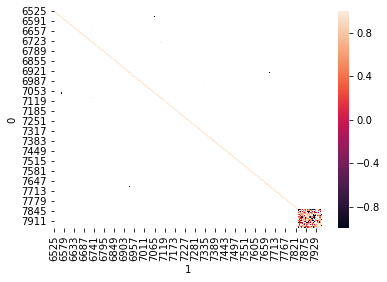

In [72]:
# library
import seaborn as sns
import pandas as pd
import numpy as np
 
df = pd.DataFrame([(6525,6525,1),(6526,6526,1),(6527,6527,1),(6528,6528,1),(6529,6529,1),(6530,6530,1),(6531,6531,1),(6532,6532,1),(6533,6533,1),(6534,6534,1),(6535,6535,1),(6536,6536,1),(6537,6537,1),(6538,6538,1),(6539,6539,1),(6540,6540,1),(6541,6541,1),(6542,6542,1),(6543,6543,1),(6544,6544,1),(6545,6545,1),(6546,6546,1),(6547,6547,1),(6548,6548,1),(6549,6549,1),(6550,6550,1),(6551,6551,1),(6552,6552,1),(6553,6553,1),(6554,6554,1),(6555,6555,1),(6556,6556,1),(6557,6557,1),(6558,6558,1),(6559,6559,1),(6560,6560,1),(6561,6561,1),(6562,6562,1),(6563,6563,1),(6564,6564,1),(6564,7067,-1),(6565,6565,1),(6566,6566,1),(6567,6567,1),(6568,6568,1),(6569,6569,1),(6570,6570,1),(6571,6571,1),(6572,6572,1),(6573,6573,1),(6574,6574,1),(6575,6575,1),(6576,6576,1),(6577,6577,1),(6578,6578,1),(6579,6579,1),(6580,6580,1),(6581,6581,1),(6582,6582,1),(6583,6583,1),(6584,6584,1),(6585,6585,1),(6586,6586,1),(6587,6587,1),(6588,6588,1),(6589,6589,1),(6590,6590,1),(6591,6591,1),(6592,6592,1),(6593,6593,1),(6594,6594,1),(6595,6595,1),(6596,6596,1),(6597,6597,1),(6598,6598,1),(6599,6599,1),(6600,6600,1),(6601,6601,1),(6602,6602,1),(6603,6603,1),(6604,6604,1),(6605,6605,1),(6606,6606,1),(6607,6607,1),(6608,6608,1),(6609,6609,1),(6610,6610,1),(6611,6611,1),(6612,6612,1),(6613,6613,1),(6614,6614,1),(6615,6615,1),(6616,6616,1),(6617,6617,1),(6618,6618,1),(6619,6619,1),(6620,6620,1),(6621,6621,1),(6622,6622,1),(6623,6623,1),(6624,6624,1),(6625,6625,1),(6626,6626,1),(6627,6627,1),(6628,6628,1),(6629,6629,1),(6630,6630,1),(6631,6631,1),(6632,6632,1),(6633,6633,1),(6634,6634,1),(6635,6635,1),(6636,6636,1),(6637,6637,1),(6638,6638,1),(6639,6639,1),(6640,6640,1),(6641,6641,1),(6642,6642,1),(6643,6643,1),(6644,6644,1),(6645,6645,1),(6646,6646,1),(6647,6647,1),(6648,6648,1),(6649,6649,1),(6650,6650,1),(6650,6733,1),(6651,6651,1),(6652,6652,1),(6653,6653,1),(6654,6654,1),(6655,6655,1),(6656,6656,1),(6657,6657,1),(6658,6658,1),(6659,6659,1),(6660,6660,1),(6661,6661,1),(6662,6662,1),(6663,6663,1),(6664,6664,1),(6665,6665,1),(6666,6666,1),(6667,6667,1),(6668,6668,1),(6669,6669,1),(6670,6670,1),(6671,6671,1),(6672,6672,1),(6673,6673,1),(6674,6674,1),(6675,6675,1),(6676,6676,1),(6677,6677,1),(6678,6678,1),(6679,6679,1),(6680,6680,1),(6681,6681,1),(6682,6682,1),(6683,6683,1),(6684,6684,1),(6685,6685,1),(6686,6686,1),(6687,6687,1),(6688,6688,1),(6689,6689,1),(6690,6690,1),(6691,6691,1),(6692,6692,1),(6693,6693,1),(6694,6694,1),(6695,6695,1),(6696,6696,1),(6697,6697,1),(6698,6698,1),(6699,6699,1),(6700,6700,1),(6701,6701,1),(6702,6702,1),(6703,6703,1),(6704,6704,1),(6705,6705,1),(6706,6706,1),(6707,6707,1),(6708,6708,1),(6709,6709,1),(6710,6710,1),(6711,6711,1),(6712,6712,1),(6713,6713,1),(6714,6714,1),(6715,6715,1),(6716,6716,1),(6717,6717,1),(6718,6718,1),(6719,6719,1),(6720,6720,1),(6721,6721,1),(6722,6722,1),(6723,6723,1),(6724,6724,1),(6725,6725,1),(6726,6726,1),(6727,6727,1),(6728,6728,1),(6729,6729,1),(6730,6730,1),(6730,7098,1),(6731,6731,1),(6732,6732,1),(6733,6650,1),(6733,6733,1),(6734,6734,1),(6735,6735,1),(6736,6736,1),(6737,6737,1),(6738,6738,1),(6739,6739,1),(6740,6740,1),(6741,6741,1),(6742,6742,1),(6743,6743,1),(6744,6744,1),(6745,6745,1),(6746,6746,1),(6747,6747,1),(6748,6748,1),(6749,6749,1),(6750,6750,1),(6751,6751,1),(6752,6752,1),(6753,6753,1),(6754,6754,1),(6755,6755,1),(6756,6756,1),(6757,6757,1),(6758,6758,1),(6759,6759,1),(6760,6760,1),(6761,6761,1),(6762,6762,1),(6763,6763,1),(6764,6764,1),(6765,6765,1),(6766,6766,1),(6767,6767,1),(6768,6768,1),(6769,6769,1),(6770,6770,1),(6771,6771,1),(6772,6772,1),(6773,6773,1),(6774,6774,1),(6775,6775,1),(6776,6776,1),(6777,6777,1),(6778,6778,1),(6779,6779,1),(6780,6780,1),(6781,6781,1),(6782,6782,1),(6783,6783,1),(6784,6784,1),(6785,6785,1),(6786,6786,1),(6787,6787,1),(6788,6788,1),(6789,6789,1),(6790,6790,1),(6791,6791,1),(6792,6792,1),(6793,6793,1),(6794,6794,1),(6795,6795,1),(6796,6796,1),(6797,6797,1),(6798,6798,1),(6799,6799,1),(6800,6800,1),(6801,6801,1),(6802,6802,1),(6803,6803,1),(6804,6804,1),(6805,6805,1),(6806,6806,1),(6807,6807,1),(6808,6808,1),(6809,6809,1),(6810,6810,1),(6811,6811,1),(6812,6812,1),(6813,6813,1),(6814,6814,1),(6815,6815,1),(6816,6816,1),(6817,6817,1),(6818,6818,1),(6819,6819,1),(6820,6820,1),(6821,6821,1),(6822,6822,1),(6823,6823,1),(6824,6824,1),(6825,6825,1),(6826,6826,1),(6827,6827,1),(6828,6828,1),(6829,6829,1),(6830,6830,1),(6831,6831,1),(6832,6832,1),(6833,6833,1),(6834,6834,1),(6835,6835,1),(6836,6836,1),(6837,6837,1),(6838,6838,1),(6839,6839,1),(6840,6840,1),(6841,6841,1),(6842,6842,1),(6843,6843,1),(6844,6844,1),(6845,6845,1),(6846,6846,1),(6847,6847,1),(6848,6848,1),(6849,6849,1),(6850,6850,1),(6851,6851,1),(6852,6852,1),(6853,6853,1),(6854,6854,1),(6855,6855,1),(6856,6856,1),(6857,6857,1),(6858,6858,1),(6859,6859,1),(6860,6860,1),(6861,6861,1),(6862,6862,1),(6863,6863,1),(6864,6864,1),(6865,6865,1),(6866,6866,1),(6867,6867,1),(6868,6868,1),(6869,6869,1),(6870,6870,1),(6871,6871,1),(6872,6872,1),(6873,6873,1),(6874,6874,1),(6875,6875,1),(6876,6876,1),(6877,6877,1),(6878,6878,1),(6879,6879,1),(6880,6880,1),(6881,6881,1),(6882,6882,1),(6883,6883,1),(6884,6884,1),(6885,6885,1),(6886,6886,1),(6887,6887,1),(6888,6888,1),(6889,6889,1),(6890,6890,1),(6891,6891,1),(6892,6892,1),(6893,6893,1),(6894,6894,1),(6895,6895,1),(6896,6896,1),(6897,6897,1),(6898,6898,1),(6899,6899,1),(6900,6900,1),(6901,6901,1),(6902,6902,1),(6903,6903,1),(6904,6904,1),(6905,6905,1),(6906,6906,1),(6907,6907,1),(6908,6908,1),(6909,6909,1),(6910,6910,1),(6911,6911,1),(6912,6912,1),(6913,6913,1),(6914,6914,1),(6915,6915,1),(6916,6916,1),(6917,6917,1),(6918,6918,1),(6919,6919,1),(6920,6920,1),(6921,6921,1),(6922,6922,1),(6923,6923,1),(6924,6924,1),(6925,6925,1),(6926,6926,1),(6927,6927,1),(6928,6928,1),(6929,6929,1),(6930,6930,1),(6930,7683,-1),(6931,6931,1),(6932,6932,1),(6933,6933,1),(6934,6934,1),(6935,6935,1),(6936,6936,1),(6937,6937,1),(6938,6938,1),(6939,6939,1),(6940,6940,1),(6941,6941,1),(6942,6942,1),(6943,6943,1),(6944,6944,1),(6945,6945,1),(6946,6946,1),(6947,6947,1),(6948,6948,1),(6949,6949,1),(6950,6950,1),(6951,6951,1),(6952,6952,1),(6953,6953,1),(6954,6954,1),(6955,6955,1),(6956,6956,1),(6957,6957,1),(6958,6958,1),(6959,6959,1),(6960,6960,1),(6961,6961,1),(6962,6962,1),(6963,6963,1),(6964,6964,1),(6965,6965,1),(6966,6966,1),(6967,6967,1),(6968,6968,1),(6969,6969,1),(6970,6970,1),(6971,6971,1),(6972,6972,1),(6973,6973,1),(6974,6974,1),(6975,6975,1),(6976,6976,1),(6977,6977,1),(6978,6978,1),(6979,6979,1),(6980,6980,1),(6981,6981,1),(6982,6982,1),(6983,6983,1),(6984,6984,1),(6985,6985,1),(6986,6986,1),(6987,6987,1),(6988,6988,1),(6989,6989,1),(6990,6990,1),(6991,6991,1),(6992,6992,1),(6993,6993,1),(6994,6994,1),(6995,6995,1),(6996,6996,1),(6997,6997,1),(6998,6998,1),(6999,6999,1),(7000,7000,1),(7001,7001,1),(7002,7002,1),(7003,7003,1),(7004,7004,1),(7005,7005,1),(7006,7006,1),(7007,7007,1),(7008,7008,1),(7009,7009,1),(7010,7010,1),(7011,7011,1),(7012,7012,1),(7013,7013,1),(7014,7014,1),(7015,7015,1),(7016,7016,1),(7017,7017,1),(7018,7018,1),(7019,7019,1),(7020,7020,1),(7021,7021,1),(7022,7022,1),(7023,7023,1),(7023,7332,1),(7024,7024,1),(7025,7025,1),(7026,7026,1),(7027,7027,1),(7028,7028,1),(7029,7029,1),(7030,7030,1),(7031,7031,1),(7032,7032,1),(7033,7033,1),(7034,7034,1),(7035,7035,1),(7036,7036,1),(7037,7037,1),(7038,7038,1),(7039,7039,1),(7040,7040,1),(7041,7041,1),(7042,7042,1),(7043,7043,1),(7044,7044,1),(7045,7045,1),(7046,7046,1),(7047,7047,1),(7048,7048,1),(7049,7049,1),(7050,7050,1),(7051,7051,1),(7052,7052,1),(7053,7053,1),(7054,7054,1),(7055,7055,1),(7056,7056,1),(7057,7057,1),(7058,7058,1),(7059,7059,1),(7060,7060,1),(7061,7061,1),(7062,7062,1),(7063,7063,1),(7064,7064,1),(7065,7065,1),(7066,7066,1),(7067,6564,-1),(7067,7067,1),(7068,7068,1),(7069,7069,1),(7070,7070,1),(7071,7071,1),(7072,7072,1),(7073,7073,1),(7074,7074,1),(7075,7075,1),(7076,7076,1),(7077,7077,1),(7078,7078,1),(7079,7079,1),(7080,7080,1),(7081,7081,1),(7082,7082,1),(7083,7083,1),(7084,7084,1),(7085,7085,1),(7086,7086,1),(7087,7087,1),(7088,7088,1),(7089,7089,1),(7090,7090,1),(7091,7091,1),(7092,7092,1),(7093,7093,1),(7094,7094,1),(7095,7095,1),(7096,7096,1),(7097,7097,1),(7098,6730,1),(7098,7098,1),(7099,7099,1),(7100,7100,1),(7101,7101,1),(7102,7102,1),(7103,7103,1),(7104,7104,1),(7105,7105,1),(7106,7106,1),(7107,7107,1),(7108,7108,1),(7109,7109,1),(7110,7110,1),(7111,7111,1),(7112,7112,1),(7113,7113,1),(7114,7114,1),(7115,7115,1),(7116,7116,1),(7117,7117,1),(7118,7118,1),(7119,7119,1),(7120,7120,1),(7121,7121,1),(7122,7122,1),(7123,7123,1),(7124,7124,1),(7125,7125,1),(7126,7126,1),(7127,7127,1),(7128,7128,1),(7129,7129,1),(7130,7130,1),(7131,7131,1),(7132,7132,1),(7133,7133,1),(7134,7134,1),(7135,7135,1),(7136,7136,1),(7137,7137,1),(7138,7138,1),(7139,7139,1),(7140,7140,1),(7141,7141,1),(7142,7142,1),(7143,7143,1),(7144,7144,1),(7145,7145,1),(7146,7146,1),(7147,7147,1),(7148,7148,1),(7149,7149,1),(7150,7150,1),(7151,7151,1),(7152,7152,1),(7153,7153,1),(7154,7154,1),(7155,7155,1),(7156,7156,1),(7157,7157,1),(7158,7158,1),(7159,7159,1),(7160,7160,1),(7161,7161,1),(7162,7162,1),(7163,7163,1),(7164,7164,1),(7165,7165,1),(7166,7166,1),(7167,7167,1),(7168,7168,1),(7169,7169,1),(7170,7170,1),(7171,7171,1),(7172,7172,1),(7173,7173,1),(7174,7174,1),(7175,7175,1),(7176,7176,1),(7177,7177,1),(7178,7178,1),(7179,7179,1),(7180,7180,1),(7181,7181,1),(7182,7182,1),(7183,7183,1),(7184,7184,1),(7185,7185,1),(7186,7186,1),(7187,7187,1),(7188,7188,1),(7189,7189,1),(7190,7190,1),(7191,7191,1),(7192,7192,1),(7193,7193,1),(7194,7194,1),(7195,7195,1),(7196,7196,1),(7197,7197,1),(7198,7198,1),(7199,7199,1),(7200,7200,1),(7201,7201,1),(7202,7202,1),(7203,7203,1),(7204,7204,1),(7205,7205,1),(7206,7206,1),(7207,7207,1),(7208,7208,1),(7209,7209,1),(7210,7210,1),(7211,7211,1),(7212,7212,1),(7213,7213,1),(7214,7214,1),(7215,7215,1),(7216,7216,1),(7217,7217,1),(7218,7218,1),(7219,7219,1),(7220,7220,1),(7221,7221,1),(7222,7222,1),(7223,7223,1),(7224,7224,1),(7225,7225,1),(7226,7226,1),(7227,7227,1),(7228,7228,1),(7229,7229,1),(7230,7230,1),(7231,7231,1),(7232,7232,1),(7233,7233,1),(7234,7234,1),(7235,7235,1),(7236,7236,1),(7237,7237,1),(7238,7238,1),(7239,7239,1),(7240,7240,1),(7241,7241,1),(7242,7242,1),(7243,7243,1),(7244,7244,1),(7245,7245,1),(7246,7246,1),(7247,7247,1),(7248,7248,1),(7249,7249,1),(7250,7250,1),(7251,7251,1),(7252,7252,1),(7253,7253,1),(7254,7254,1),(7255,7255,1),(7256,7256,1),(7257,7257,1),(7258,7258,1),(7259,7259,1),(7260,7260,1),(7261,7261,1),(7262,7262,1),(7263,7263,1),(7264,7264,1),(7265,7265,1),(7266,7266,1),(7267,7267,1),(7268,7268,1),(7269,7269,1),(7270,7270,1),(7271,7271,1),(7272,7272,1),(7273,7273,1),(7274,7274,1),(7275,7275,1),(7276,7276,1),(7277,7277,1),(7278,7278,1),(7279,7279,1),(7280,7280,1),(7281,7281,1),(7282,7282,1),(7283,7283,1),(7284,7284,1),(7285,7285,1),(7286,7286,1),(7287,7287,1),(7288,7288,1),(7289,7289,1),(7290,7290,1),(7291,7291,1),(7292,7292,1),(7293,7293,1),(7294,7294,1),(7295,7295,1),(7296,7296,1),(7297,7297,1),(7298,7298,1),(7299,7299,1),(7300,7300,1),(7301,7301,1),(7302,7302,1),(7303,7303,1),(7304,7304,1),(7305,7305,1),(7306,7306,1),(7307,7307,1),(7308,7308,1),(7309,7309,1),(7310,7310,1),(7311,7311,1),(7312,7312,1),(7313,7313,1),(7314,7314,1),(7315,7315,1),(7316,7316,1),(7317,7317,1),(7318,7318,1),(7319,7319,1),(7320,7320,1),(7321,7321,1),(7322,7322,1),(7323,7323,1),(7324,7324,1),(7325,7325,1),(7326,7326,1),(7327,7327,1),(7328,7328,1),(7329,7329,1),(7330,7330,1),(7331,7331,1),(7332,7023,1),(7332,7332,1),(7333,7333,1),(7334,7334,1),(7335,7335,1),(7336,7336,1),(7337,7337,1),(7338,7338,1),(7339,7339,1),(7340,7340,1),(7341,7341,1),(7342,7342,1),(7343,7343,1),(7344,7344,1),(7345,7345,1),(7346,7346,1),(7347,7347,1),(7348,7348,1),(7349,7349,1),(7350,7350,1),(7351,7351,1),(7352,7352,1),(7353,7353,1),(7354,7354,1),(7355,7355,1),(7356,7356,1),(7357,7357,1),(7358,7358,1),(7359,7359,1),(7360,7360,1),(7361,7361,1),(7362,7362,1),(7363,7363,1),(7364,7364,1),(7365,7365,1),(7366,7366,1),(7367,7367,1),(7368,7368,1),(7369,7369,1),(7370,7370,1),(7371,7371,1),(7372,7372,1),(7373,7373,1),(7374,7374,1),(7375,7375,1),(7376,7376,1),(7377,7377,1),(7378,7378,1),(7379,7379,1),(7380,7380,1),(7381,7381,1),(7382,7382,1),(7383,7383,1),(7384,7384,1),(7385,7385,1),(7386,7386,1),(7387,7387,1),(7388,7388,1),(7389,7389,1),(7390,7390,1),(7391,7391,1),(7392,7392,1),(7393,7393,1),(7394,7394,1),(7395,7395,1),(7396,7396,1),(7397,7397,1),(7398,7398,1),(7399,7399,1),(7400,7400,1),(7401,7401,1),(7402,7402,1),(7403,7403,1),(7404,7404,1),(7405,7405,1),(7406,7406,1),(7407,7407,1),(7408,7408,1),(7409,7409,1),(7410,7410,1),(7411,7411,1),(7412,7412,1),(7413,7413,1),(7414,7414,1),(7415,7415,1),(7416,7416,1),(7417,7417,1),(7418,7418,1),(7419,7419,1),(7420,7420,1),(7421,7421,1),(7422,7422,1),(7423,7423,1),(7424,7424,1),(7425,7425,1),(7426,7426,1),(7427,7427,1),(7428,7428,1),(7429,7429,1),(7430,7430,1),(7431,7431,1),(7432,7432,1),(7433,7433,1),(7434,7434,1),(7435,7435,1),(7436,7436,1),(7437,7437,1),(7438,7438,1),(7439,7439,1),(7440,7440,1),(7441,7441,1),(7442,7442,1),(7443,7443,1),(7444,7444,1),(7445,7445,1),(7446,7446,1),(7447,7447,1),(7448,7448,1),(7449,7449,1),(7450,7450,1),(7451,7451,1),(7452,7452,1),(7453,7453,1),(7454,7454,1),(7455,7455,1),(7456,7456,1),(7457,7457,1),(7458,7458,1),(7459,7459,1),(7460,7460,1),(7461,7461,1),(7462,7462,1),(7463,7463,1),(7464,7464,1),(7465,7465,1),(7466,7466,1),(7467,7467,1),(7468,7468,1),(7469,7469,1),(7470,7470,1),(7471,7471,1),(7472,7472,1),(7473,7473,1),(7474,7474,1),(7475,7475,1),(7476,7476,1),(7477,7477,1),(7478,7478,1),(7479,7479,1),(7480,7480,1),(7481,7481,1),(7482,7482,1),(7483,7483,1),(7484,7484,1),(7485,7485,1),(7486,7486,1),(7487,7487,1),(7488,7488,1),(7489,7489,1),(7490,7490,1),(7491,7491,1),(7492,7492,1),(7493,7493,1),(7494,7494,1),(7495,7495,1),(7496,7496,1),(7497,7497,1),(7498,7498,1),(7499,7499,1),(7500,7500,1),(7501,7501,1),(7502,7502,1),(7503,7503,1),(7504,7504,1),(7505,7505,1),(7506,7506,1),(7507,7507,1),(7508,7508,1),(7509,7509,1),(7510,7510,1),(7511,7511,1),(7512,7512,1),(7513,7513,1),(7514,7514,1),(7515,7515,1),(7516,7516,1),(7517,7517,1),(7518,7518,1),(7519,7519,1),(7520,7520,1),(7521,7521,1),(7522,7522,1),(7523,7523,1),(7524,7524,1),(7525,7525,1),(7526,7526,1),(7527,7527,1),(7528,7528,1),(7529,7529,1),(7530,7530,1),(7531,7531,1),(7532,7532,1),(7533,7533,1),(7534,7534,1),(7535,7535,1),(7536,7536,1),(7537,7537,1),(7538,7538,1),(7539,7539,1),(7540,7540,1),(7541,7541,1),(7542,7542,1),(7543,7543,1),(7544,7544,1),(7545,7545,1),(7546,7546,1),(7547,7547,1),(7548,7548,1),(7549,7549,1),(7550,7550,1),(7551,7551,1),(7552,7552,1),(7553,7553,1),(7554,7554,1),(7555,7555,1),(7556,7556,1),(7557,7557,1),(7558,7558,1),(7559,7559,1),(7560,7560,1),(7561,7561,1),(7562,7562,1),(7563,7563,1),(7564,7564,1),(7565,7565,1),(7566,7566,1),(7567,7567,1),(7568,7568,1),(7569,7569,1),(7570,7570,1),(7571,7571,1),(7572,7572,1),(7573,7573,1),(7574,7574,1),(7575,7575,1),(7576,7576,1),(7577,7577,1),(7578,7578,1),(7579,7579,1),(7580,7580,1),(7581,7581,1),(7582,7582,1),(7583,7583,1),(7584,7584,1),(7585,7585,1),(7586,7586,1),(7587,7587,1),(7588,7588,1),(7589,7589,1),(7590,7590,1),(7591,7591,1),(7592,7592,1),(7593,7593,1),(7594,7594,1),(7595,7595,1),(7596,7596,1),(7597,7597,1),(7598,7598,1),(7599,7599,1),(7600,7600,1),(7601,7601,1),(7602,7602,1),(7603,7603,1),(7604,7604,1),(7605,7605,1),(7606,7606,1),(7607,7607,1),(7608,7608,1),(7609,7609,1),(7610,7610,1),(7611,7611,1),(7612,7612,1),(7613,7613,1),(7614,7614,1),(7615,7615,1),(7616,7616,1),(7617,7617,1),(7618,7618,1),(7619,7619,1),(7620,7620,1),(7621,7621,1),(7622,7622,1),(7623,7623,1),(7624,7624,1),(7625,7625,1),(7626,7626,1),(7627,7627,1),(7628,7628,1),(7629,7629,1),(7630,7630,1),(7631,7631,1),(7632,7632,1),(7633,7633,1),(7634,7634,1),(7635,7635,1),(7636,7636,1),(7637,7637,1),(7638,7638,1),(7639,7639,1),(7640,7640,1),(7641,7641,1),(7642,7642,1),(7643,7643,1),(7644,7644,1),(7645,7645,1),(7646,7646,1),(7647,7647,1),(7648,7648,1),(7649,7649,1),(7650,7650,1),(7651,7651,1),(7652,7652,1),(7653,7653,1),(7654,7654,1),(7655,7655,1),(7656,7656,1),(7657,7657,1),(7658,7658,1),(7659,7659,1),(7660,7660,1),(7661,7661,1),(7662,7662,1),(7663,7663,1),(7664,7664,1),(7665,7665,1),(7666,7666,1),(7667,7667,1),(7668,7668,1),(7669,7669,1),(7670,7670,1),(7671,7671,1),(7672,7672,1),(7673,7673,1),(7674,7674,1),(7675,7675,1),(7676,7676,1),(7677,7677,1),(7678,7678,1),(7679,7679,1),(7680,7680,1),(7681,7681,1),(7682,7682,1),(7683,6930,-1),(7683,7683,1),(7684,7684,1),(7685,7685,1),(7686,7686,1),(7687,7687,1),(7688,7688,1),(7689,7689,1),(7690,7690,1),(7691,7691,1),(7692,7692,1),(7693,7693,1),(7694,7694,1),(7695,7695,1),(7696,7696,1),(7697,7697,1),(7698,7698,1),(7699,7699,1),(7700,7700,1),(7701,7701,1),(7702,7702,1),(7703,7703,1),(7704,7704,1),(7705,7705,1),(7706,7706,1),(7707,7707,1),(7708,7708,1),(7709,7709,1),(7710,7710,1),(7711,7711,1),(7712,7712,1),(7713,7713,1),(7714,7714,1),(7715,7715,1),(7716,7716,1),(7717,7717,1),(7718,7718,1),(7719,7719,1),(7720,7720,1),(7721,7721,1),(7722,7722,1),(7723,7723,1),(7724,7724,1),(7725,7725,1),(7726,7726,1),(7727,7727,1),(7728,7728,1),(7729,7729,1),(7730,7730,1),(7731,7731,1),(7732,7732,1),(7733,7733,1),(7734,7734,1),(7735,7735,1),(7736,7736,1),(7737,7737,1),(7738,7738,1),(7739,7739,1),(7740,7740,1),(7741,7741,1),(7742,7742,1),(7743,7743,1),(7744,7744,1),(7745,7745,1),(7746,7746,1),(7747,7747,1),(7748,7748,1),(7749,7749,1),(7750,7750,1),(7751,7751,1),(7752,7752,1),(7753,7753,1),(7754,7754,1),(7755,7755,1),(7756,7756,1),(7757,7757,1),(7758,7758,1),(7759,7759,1),(7760,7760,1),(7761,7761,1),(7762,7762,1),(7763,7763,1),(7764,7764,1),(7765,7765,1),(7766,7766,1),(7767,7767,1),(7768,7768,1),(7769,7769,1),(7770,7770,1),(7771,7771,1),(7772,7772,1),(7773,7773,1),(7774,7774,1),(7775,7775,1),(7776,7776,1),(7777,7777,1),(7778,7778,1),(7779,7779,1),(7780,7780,1),(7781,7781,1),(7782,7782,1),(7783,7783,1),(7784,7784,1),(7785,7785,1),(7786,7786,1),(7787,7787,1),(7788,7788,1),(7789,7789,1),(7790,7790,1),(7791,7791,1),(7792,7792,1),(7793,7793,1),(7794,7794,1),(7795,7795,1),(7796,7796,1),(7797,7797,1),(7798,7798,1),(7799,7799,1),(7800,7800,1),(7801,7801,1),(7802,7802,1),(7803,7803,1),(7804,7804,1),(7805,7805,1),(7806,7806,1),(7807,7807,1),(7808,7808,1),(7809,7809,1),(7810,7810,1),(7811,7811,1),(7812,7812,1),(7813,7813,1),(7814,7814,1),(7815,7815,1),(7816,7816,1),(7817,7817,1),(7818,7818,1),(7819,7819,1),(7820,7820,1),(7821,7821,1),(7822,7822,1),(7823,7823,1),(7824,7824,1),(7825,7825,1),(7826,7826,1),(7827,7827,1),(7828,7828,1),(7829,7829,1),(7830,7830,1),(7831,7831,1),(7832,7832,1),(7833,7833,1),(7834,7834,1),(7835,7835,1),(7835,7840,0),(7835,7848,0.333333),(7835,7849,0.33541),(7835,7861,1),(7835,7866,-0.57735),(7835,7867,0.333333),(7835,7884,0.353553),(7835,7896,0.5),(7835,7900,0.866025),(7835,7908,1),(7835,7914,0.522233),(7835,7918,0.471405),(7835,7919,0.707107),(7835,7940,1),(7835,7950,0.5),(7836,7836,1),(7836,7839,0),(7836,7851,-1),(7836,7855,-1),(7836,7899,1),(7837,7837,1),(7837,7840,-1),(7837,7854,0.57735),(7837,7857,1),(7837,7858,0.724207),(7837,7865,0.806226),(7837,7866,-0.5),(7837,7867,1),(7837,7868,0.866025),(7837,7869,-0.133631),(7837,7870,0.57735),(7837,7882,0.866025),(7837,7897,0.333333),(7837,7904,-0.133631),(7837,7905,0.166667),(7837,7911,0.845154),(7837,7924,1),(7837,7928,0.492248),(7837,7931,1),(7837,7933,1),(7837,7943,0),(7837,7952,0.741825),(7837,7953,1),(7838,7838,1),(7838,7852,0.333333),(7838,7854,0.301511),(7838,7857,-0.57735),(7838,7858,0.5),(7838,7866,1),(7838,7869,0.866025),(7838,7870,0.5),(7838,7875,0.078811),(7838,7878,0.645497),(7838,7903,0.852803),(7838,7904,0.866025),(7838,7906,1),(7838,7907,0.306786),(7838,7909,1),(7838,7924,-1),(7838,7928,0.22771),(7838,7931,0.870388),(7838,7937,0.612372),(7838,7943,0.763763),(7838,7945,0.912871),(7838,7948,-0.090909),(7838,7952,0),(7838,7954,-1),(7839,7836,0),(7839,7839,1),(7839,7855,-1),(7839,7876,0.5),(7839,7899,1),(7840,7835,0),(7840,7837,-1),(7840,7840,1),(7840,7848,0.636396),(7840,7849,-0.570088),(7840,7852,0.695608),(7840,7853,0.656532),(7840,7858,0.208013),(7840,7865,0.333333),(7840,7866,0.771929),(7840,7869,0.408248),(7840,7870,0.373773),(7840,7874,0.316168),(7840,7878,1),(7840,7884,1),(7840,7885,0.166667),(7840,7891,0.657051),(7840,7892,0.636364),(7840,7896,0.057735),(7840,7897,0.326236),(7840,7900,1),(7840,7901,0.87831),(7840,7902,-1),(7840,7904,0.866025),(7840,7906,0.143126),(7840,7907,-1),(7840,7908,0.171499),(7840,7909,0.322329),(7840,7910,0.327327),(7840,7911,0.298807),(7840,7912,0.39841),(7840,7914,-1),(7840,7915,-0.174078),(7840,7916,0.793884),(7840,7918,1),(7840,7919,-0.5),(7840,7928,0.267696),(7840,7930,0.645497),(7840,7937,1),(7840,7950,0),(7840,7952,0.357725),(7841,7841,1),(7841,7850,0.5),(7841,7857,-1),(7841,7869,-0.5),(7841,7878,1),(7841,7911,0),(7841,7928,0.5),(7841,7930,1),(7841,7937,-0.5),(7841,7938,-1),(7841,7943,0.5),(7841,7952,1),(7842,7842,1),(7842,7859,0.870388),(7842,7925,0),(7842,7932,0.333333),(7842,7946,0),(7843,7843,1),(7843,7859,1),(7843,7860,1),(7843,7871,-0.166667),(7843,7927,0.904534),(7843,7931,0),(7843,7934,1),(7843,7949,1),(7843,7951,1),(7843,7956,-0.5),(7843,7957,0.57735),(7843,7958,1),(7843,7960,1),(7844,7844,1),(7844,7847,-0.5),(7844,7861,1),(7844,7863,0.301511),(7844,7867,1),(7844,7884,0.5),(7844,7914,0.5),(7844,7918,-1),(7844,7922,1),(7844,7939,-0.090909),(7844,7940,1),(7845,7845,1),(7845,7847,-0.301511),(7845,7863,0.522233),(7845,7914,1),(7845,7918,0.866025),(7845,7929,0.5),(7845,7940,1),(7846,7846,1),(7847,7844,-0.5),(7847,7845,-0.301511),(7847,7847,1),(7847,7863,-0.727607),(7847,7867,-1),(7847,7884,-0.5),(7847,7914,-1),(7847,7918,-0.57735),(7847,7922,-0.5),(7847,7929,0.522233),(7847,7939,1),(7848,7835,0.333333),(7848,7840,0.636396),(7848,7848,1),(7848,7849,-0.612372),(7848,7852,1),(7848,7862,-1),(7848,7867,-1),(7848,7891,0),(7848,7900,0.5),(7848,7901,0.5),(7848,7906,0.594089),(7848,7908,0.763763),(7848,7909,0.904534),(7848,7910,0.218218),(7848,7912,0),(7848,7915,-0.158114),(7848,7919,0.866025),(7848,7950,0.426401),(7849,7835,0.33541),(7849,7840,-0.570088),(7849,7848,-0.612372),(7849,7849,1),(7849,7852,-1),(7849,7866,0.870388),(7849,7867,0.645497),(7849,7874,0),(7849,7884,0.65),(7849,7888,1),(7849,7896,1),(7849,7897,0),(7849,7900,0.422577),(7849,7906,1),(7849,7908,0.333333),(7849,7910,0.5),(7849,7912,-0.5),(7849,7914,0.852803),(7849,7915,0.522233),(7849,7918,0.273861),(7849,7919,0.434524),(7849,7928,-0.5),(7850,7841,0.5),(7850,7850,1),(7850,7857,0.5),(7850,7944,1),(7851,7836,-1),(7851,7851,1),(7851,7921,-0.5),(7852,7838,0.333333),(7852,7840,0.695608),(7852,7848,1),(7852,7849,-1),(7852,7852,1),(7852,7866,-0.203653),(7852,7878,1),(7852,7892,-1),(7852,7897,0.316228),(7852,7898,1),(7852,7906,0.461538),(7852,7909,0.133631),(7852,7912,-0.46291),(7852,7916,-0.333333),(7852,7928,0.174078),(7852,7952,-0.218218),(7853,7840,0.656532),(7853,7853,1),(7853,7858,0),(7853,7866,0.700877),(7853,7870,0.559017),(7853,7874,0.852941),(7853,7885,-1),(7853,7891,0),(7853,7892,-1),(7853,7896,0.5),(7853,7897,-0.866025),(7853,7904,1),(7853,7906,0.174078),(7853,7909,0.868599),(7853,7912,-0.301511),(7853,7916,0.866025),(7853,7928,0.454545),(7853,7930,0.870388),(7853,7952,0.852803),(7854,7837,0.57735),(7854,7838,0.301511),(7854,7854,1),(7854,7857,1),(7854,7858,0.870388),(7854,7865,-0.090909),(7854,7867,1),(7854,7868,1),(7854,7882,1),(7854,7897,1),(7854,7905,0.25),(7854,7911,1),(7854,7928,-0.592927),(7854,7931,0.636364),(7854,7948,1),(7854,7952,0),(7855,7836,-1),(7855,7839,-1),(7855,7855,1),(7855,7899,0),(7856,7856,1),(7856,7864,0.57735),(7856,7886,-0.5),(7856,7889,1),(7857,7837,1),(7857,7838,-0.57735),(7857,7841,-1),(7857,7850,0.5),(7857,7854,1),(7857,7857,1),(7857,7858,0.866025),(7857,7867,0.875),(7857,7869,-0.5),(7857,7875,1),(7857,7905,-0.5),(7857,7907,0),(7857,7911,0.46291),(7857,7913,0.904534),(7857,7924,0.845154),(7857,7928,0),(7857,7931,1),(7857,7938,1),(7857,7944,0.5),(7857,7952,0.870388),(7857,7959,1),(7858,7837,0.724207),(7858,7838,0.5),(7858,7840,0.208013),(7858,7853,0),(7858,7854,0.870388),(7858,7857,0.866025),(7858,7858,1),(7858,7862,-1),(7858,7865,0.569803),(7858,7866,0.454859),(7858,7867,1),(7858,7868,1),(7858,7869,0.848838),(7858,7870,0.845154),(7858,7874,0.043478),(7858,7875,0.5),(7858,7878,0.5),(7858,7882,0.707107),(7858,7885,0.166667),(7858,7887,-0.375),(7858,7891,0.494975),(7858,7892,-1),(7858,7896,0.25),(7858,7897,0.6825),(7858,7901,0),(7858,7904,0.071429),(7858,7905,0.567613),(7858,7906,0.933257),(7858,7908,-0.25),(7858,7909,0.276316),(7858,7910,0.5),(7858,7911,0.435897),(7858,7912,0.57735),(7858,7916,0.682288),(7858,7919,1),(7858,7924,1),(7858,7928,0.625),(7858,7930,0.435897),(7858,7931,1),(7858,7937,0.612372),(7858,7945,0.522233),(7858,7948,0.866025),(7858,7950,1),(7858,7952,0.703452),(7859,7842,0.870388),(7859,7843,1),(7859,7859,1),(7859,7860,1),(7859,7871,0),(7859,7883,1),(7859,7925,0),(7859,7927,0.866025),(7859,7931,-0.707107),(7859,7932,-0.174078),(7859,7946,-0.5),(7859,7951,1),(7859,7957,1),(7860,7843,1),(7860,7859,1),(7860,7860,1),(7860,7871,0.866025),(7860,7883,0.904534),(7860,7927,1),(7860,7935,0.816497),(7860,7957,1),(7861,7835,1),(7861,7844,1),(7861,7861,1),(7861,7863,0.5),(7861,7867,1),(7861,7884,0.866025),(7861,7922,0.816497),(7861,7929,1),(7861,7939,0.866025),(7861,7940,1),(7862,7848,-1),(7862,7858,-1),(7862,7862,1),(7862,7882,0.866025),(7862,7897,1),(7862,7910,0.5),(7862,7915,-1),(7862,7950,-1),(7862,7952,-1),(7863,7844,0.301511),(7863,7845,0.522233),(7863,7847,-0.727607),(7863,7861,0.5),(7863,7863,1),(7863,7867,0.333333),(7863,7884,0.904534),(7863,7914,0.866025),(7863,7918,1),(7863,7922,-0.5),(7863,7929,-0.57735),(7863,7939,0.5),(7864,7856,0.57735),(7864,7864,1),(7864,7886,0.57735),(7864,7889,1),(7865,7837,0.806226),(7865,7840,0.333333),(7865,7854,-0.090909),(7865,7858,0.569803),(7865,7865,1),(7865,7866,-0.5),(7865,7868,0.904534),(7865,7869,-0.166667),(7865,7870,1),(7865,7875,0.333333),(7865,7878,0.866025),(7865,7882,0.707107),(7865,7885,1),(7865,7891,-0.333333),(7865,7897,0.680614),(7865,7904,-0.707107),(7865,7905,0.451613),(7865,7906,0.866025),(7865,7907,-0.174078),(7865,7909,0.845154),(7865,7910,0.5),(7865,7911,0.881917),(7865,7924,1),(7865,7928,0.575034),(7865,7930,0.612372),(7865,7931,0.866025),(7865,7937,0.680614),(7865,7938,-1),(7865,7943,0),(7865,7945,0.707107),(7865,7948,1),(7865,7952,0.707107),(7865,7954,0.904534),(7866,7835,-0.57735),(7866,7837,-0.5),(7866,7838,1),(7866,7840,0.771929),(7866,7849,0.870388),(7866,7852,-0.203653),(7866,7853,0.700877),(7866,7858,0.454859),(7866,7865,-0.5),(7866,7866,1),(7866,7869,0.700649),(7866,7870,0.612372),(7866,7874,0.565217),(7866,7882,1),(7866,7885,0),(7866,7887,0.174078),(7866,7888,0.866025),(7866,7891,0.496609),(7866,7892,0.612372),(7866,7896,0.5),(7866,7897,0.801784),(7866,7901,0.57735),(7866,7904,1),(7866,7905,0.301511),(7866,7906,0.6742),(7866,7908,0.174078),(7866,7909,0.506712),(7866,7910,1),(7866,7911,1),(7866,7912,0.648886),(7866,7916,1),(7866,7918,1),(7866,7928,0.412325),(7866,7930,0.918085),(7866,7931,1),(7866,7937,0.866025),(7866,7941,1),(7866,7945,1),(7866,7952,0.801002),(7867,7835,0.333333),(7867,7837,1),(7867,7844,1),(7867,7847,-1),(7867,7848,-1),(7867,7849,0.645497),(7867,7854,1),(7867,7857,0.875),(7867,7858,1),(7867,7861,1),(7867,7863,0.333333),(7867,7867,1),(7867,7884,0.370479),(7867,7891,1),(7867,7900,0.525226),(7867,7908,-1),(7867,7914,0.25),(7867,7918,-0.166667),(7867,7919,-0.166667),(7867,7922,1),(7867,7924,1),(7867,7931,1),(7867,7939,-0.5),(7867,7950,-1),(7867,7952,1),(7868,7837,0.866025),(7868,7854,1),(7868,7858,1),(7868,7865,0.904534),(7868,7868,1),(7868,7882,0.912871),(7868,7897,1),(7868,7904,1),(7868,7905,0.866025),(7868,7906,1),(7868,7909,1),(7868,7910,0.5),(7868,7911,1),(7868,7928,1),(7868,7937,1),(7868,7945,1),(7868,7952,1),(7869,7837,-0.133631),(7869,7838,0.866025),(7869,7840,0.408248),(7869,7841,-0.5),(7869,7857,-0.5),(7869,7858,0.848838),(7869,7865,-0.166667),(7869,7866,0.700649),(7869,7869,1),(7869,7870,1),(7869,7874,0.818182),(7869,7875,0),(7869,7885,0.25),(7869,7887,-0.408248),(7869,7891,0.875),(7869,7897,1),(7869,7903,1),(7869,7904,-0.5),(7869,7905,0.540062),(7869,7906,0.858984),(7869,7907,0.816497),(7869,7909,0.534522),(7869,7912,0.866025),(7869,7928,0.559017),(7869,7930,0),(7869,7931,1),(7869,7933,0.5),(7869,7937,1),(7869,7943,1),(7869,7945,0.852803),(7869,7948,0.866025),(7869,7952,0.443203),(7870,7837,0.57735),(7870,7838,0.5),(7870,7840,0.373773),(7870,7853,0.559017),(7870,7858,0.845154),(7870,7865,1),(7870,7866,0.612372),(7870,7869,1),(7870,7870,1),(7870,7874,0.866025),(7870,7885,0.707107),(7870,7891,1),(7870,7892,0.866025),(7870,7896,0.57735),(7870,7897,0.645497),(7870,7901,1),(7870,7905,0.666667),(7870,7907,1),(7870,7909,0.870388),(7870,7911,1),(7870,7916,0.866025),(7870,7917,-1),(7870,7928,0.620174),(7870,7930,0.522233),(7870,7931,1),(7870,7937,1),(7870,7952,0.529813),(7871,7843,-0.166667),(7871,7859,0),(7871,7860,0.866025),(7871,7871,1),(7871,7927,0),(7871,7931,0.133631),(7871,7934,0.5),(7871,7935,0.852803),(7871,7936,1),(7871,7949,0),(7871,7951,1),(7871,7956,0.707107),(7871,7957,1),(7871,7958,-1),(7872,7872,1),(7873,7873,1),(7874,7840,0.316168),(7874,7849,0),(7874,7853,0.852941),(7874,7858,0.043478),(7874,7866,0.565217),(7874,7869,0.818182),(7874,7870,0.866025),(7874,7874,1),(7874,7887,-1),(7874,7891,0.912871),(7874,7892,-1),(7874,7896,0.377964),(7874,7897,-0.301511),(7874,7901,1),(7874,7905,0.5),(7874,7906,0.166667),(7874,7909,0.7),(7874,7911,1),(7874,7912,0.518875),(7874,7916,0.870388),(7874,7919,-1),(7874,7928,0.643796),(7874,7930,0.642857),(7874,7937,0.816497),(7874,7952,0.435897),(7875,7838,0.078811),(7875,7857,1),(7875,7858,0.5),(7875,7865,0.333333),(7875,7869,0),(7875,7875,1),(7875,7885,0.904534),(7875,7903,1),(7875,7905,0),(7875,7907,0.408248),(7875,7924,1),(7875,7943,-0.57735),(7875,7945,0.866025),(7875,7948,0.133631),(7875,7952,0.25),(7875,7954,-0.57735),(7875,7959,1),(7876,7839,0.5),(7876,7876,1),(7876,7877,0.866025),(7876,7881,0.5),(7876,7893,0.866025),(7876,7895,0.866025),(7876,7921,0.57735),(7876,7923,-0.375),(7876,7931,0.870388),(7877,7876,0.866025),(7877,7877,1),(7877,7923,-1),(7877,7931,1),(7878,7838,0.645497),(7878,7840,1),(7878,7841,1),(7878,7852,1),(7878,7858,0.5),(7878,7865,0.866025),(7878,7878,1),(7878,7903,1),(7878,7905,1),(7878,7907,1),(7878,7911,0.790569),(7878,7913,1),(7878,7928,-1),(7878,7937,0.852803),(7878,7938,0),(7878,7943,0),(7878,7945,0.5),(7878,7959,0.5),(7879,7879,1),(7880,7880,1),(7881,7876,0.5),(7881,7881,1),(7881,7921,0.866025),(7882,7837,0.866025),(7882,7854,1),(7882,7858,0.707107),(7882,7862,0.866025),(7882,7865,0.707107),(7882,7866,1),(7882,7868,0.912871),(7882,7882,1),(7882,7891,0.534522),(7882,7897,0.643268),(7882,7905,0.816497),(7882,7906,1),(7882,7908,0.707107),(7882,7909,0.866025),(7882,7910,0),(7882,7911,0.691564),(7882,7915,-1),(7882,7916,1),(7882,7928,0.840168),(7882,7931,0.57735),(7882,7937,1),(7882,7941,1),(7882,7950,-0.866025),(7882,7952,0),(7882,7954,1),(7883,7859,1),(7883,7860,0.904534),(7883,7883,1),(7883,7927,1),(7883,7935,1),(7884,7835,0.353553),(7884,7840,1),(7884,7844,0.5),(7884,7847,-0.5),(7884,7849,0.65),(7884,7861,0.866025),(7884,7863,0.904534),(7884,7867,0.370479),(7884,7884,1),(7884,7900,0.547723),(7884,7914,0.273861),(7884,7918,0.810093),(7884,7919,0.102062),(7884,7922,-0.5),(7884,7939,0.5),(7884,7940,1),(7885,7840,0.166667),(7885,7853,-1),(7885,7858,0.166667),(7885,7865,1),(7885,7866,0),(7885,7869,0.25),(7885,7870,0.707107),(7885,7875,0.904534),(7885,7885,1),(7885,7891,1),(7885,7896,0.166667),(7885,7897,0),(7885,7904,-0.866025),(7885,7905,0.333333),(7885,7907,1),(7885,7909,0.5),(7885,7928,0.986666),(7885,7952,0.466667),(7886,7856,-0.5),(7886,7864,0.57735),(7886,7886,1),(7886,7889,0.838525),(7886,7921,1),(7886,7923,-1),(7887,7858,-0.375),(7887,7866,0.174078),(7887,7869,-0.408248),(7887,7874,-1),(7887,7887,1),(7887,7904,-1),(7887,7906,1),(7887,7909,1),(7887,7928,0.524891),(7887,7937,-1),(7887,7952,-0.353553),(7888,7849,1),(7888,7866,0.866025),(7888,7888,1),(7888,7896,0.5),(7888,7898,0.5),(7888,7919,1),(7889,7856,1),(7889,7864,1),(7889,7886,0.838525),(7889,7889,1),(7889,7921,1),(7889,7923,-0.866025),(7890,7890,1),(7891,7840,0.657051),(7891,7848,0),(7891,7853,0),(7891,7858,0.494975),(7891,7865,-0.333333),(7891,7866,0.496609),(7891,7867,1),(7891,7869,0.875),(7891,7870,1),(7891,7874,0.912871),(7891,7882,0.534522),(7891,7885,1),(7891,7891,1),(7891,7892,-1),(7891,7897,0.416667),(7891,7901,1),(7891,7902,1),(7891,7906,0.707107),(7891,7908,0.496139),(7891,7909,0.53033),(7891,7910,-0.258199),(7891,7911,0),(7891,7912,0.866025),(7891,7915,-0.816497),(7891,7916,0.790569),(7891,7919,-1),(7891,7928,0.881409),(7891,7930,0.226871),(7891,7931,1),(7891,7937,1),(7891,7950,-0.845154),(7891,7952,0.643596),(7892,7840,0.636364),(7892,7852,-1),(7892,7853,-1),(7892,7858,-1),(7892,7866,0.612372),(7892,7870,0.866025),(7892,7874,-1),(7892,7891,-1),(7892,7892,1),(7892,7896,0.090909),(7892,7897,-0.185695),(7892,7902,-0.866025),(7892,7909,0.5),(7892,7910,1),(7892,7912,0.57735),(7892,7928,0.408248),(7892,7952,0.262613),(7893,7876,0.866025),(7893,7893,1),(7893,7895,1),(7893,7923,0),(7893,7931,0.5),(7894,7894,1),(7894,7905,-1),(7894,7928,0.944911),(7894,7952,1),(7895,7876,0.866025),(7895,7893,1),(7895,7895,1),(7895,7920,-1),(7895,7931,0.426401),(7896,7835,0.5),(7896,7840,0.057735),(7896,7849,1),(7896,7853,0.5),(7896,7858,0.25),(7896,7866,0.5),(7896,7870,0.57735),(7896,7874,0.377964),(7896,7885,0.166667),(7896,7888,0.5),(7896,7892,0.090909),(7896,7896,1),(7896,7897,-0.57735),(7896,7898,1),(7896,7902,0.5),(7896,7904,-1),(7896,7906,0.57735),(7896,7910,1),(7896,7912,-0.166667),(7896,7915,1),(7896,7916,1),(7896,7918,1),(7896,7919,0.866025),(7896,7928,0.301511),(7896,7930,0.174078),(7896,7952,0.456435),(7897,7837,0.333333),(7897,7840,0.326236),(7897,7849,0),(7897,7852,0.316228),(7897,7853,-0.866025),(7897,7854,1),(7897,7858,0.6825),(7897,7862,1),(7897,7865,0.680614),(7897,7866,0.801784),(7897,7868,1),(7897,7869,1),(7897,7870,0.645497),(7897,7874,-0.301511),(7897,7882,0.643268),(7897,7885,0),(7897,7891,0.416667),(7897,7892,-0.185695),(7897,7896,-0.57735),(7897,7897,1),(7897,7902,0),(7897,7906,0.723339),(7897,7908,0.5),(7897,7909,-0.368037),(7897,7910,0.57735),(7897,7911,0.447214),(7897,7912,1),(7897,7916,0.807207),(7897,7928,0.482389),(7897,7930,0.567613),(7897,7931,1),(7897,7937,0.707107),(7897,7950,-1),(7897,7952,0.648886),(7898,7852,1),(7898,7888,0.5),(7898,7896,1),(7898,7898,1),(7898,7912,-1),(7898,7916,-1),(7898,7919,1),(7899,7836,1),(7899,7839,1),(7899,7855,0),(7899,7899,1),(7900,7835,0.866025),(7900,7840,1),(7900,7848,0.5),(7900,7849,0.422577),(7900,7867,0.525226),(7900,7884,0.547723),(7900,7900,1),(7900,7914,-0.071429),(7900,7915,1),(7900,7918,0.298807),(7900,7919,0),(7901,7840,0.87831),(7901,7848,0.5),(7901,7858,0),(7901,7866,0.57735),(7901,7870,1),(7901,7874,1),(7901,7891,1),(7901,7901,1),(7901,7906,0.5),(7901,7909,0.641689),(7901,7911,0.866025),(7901,7916,0.866025),(7901,7928,0.866025),(7901,7930,0.866025),(7901,7952,0.763763),(7902,7840,-1),(7902,7891,1),(7902,7892,-0.866025),(7902,7896,0.5),(7902,7897,0),(7902,7902,1),(7902,7912,0.5),(7903,7838,0.852803),(7903,7869,1),(7903,7875,1),(7903,7878,1),(7903,7903,1),(7903,7904,1),(7903,7905,1),(7903,7907,0.5),(7903,7937,0),(7903,7943,0.522233),(7903,7945,1),(7903,7952,0.5),(7904,7837,-0.133631),(7904,7838,0.866025),(7904,7840,0.866025),(7904,7853,1),(7904,7858,0.071429),(7904,7865,-0.707107),(7904,7866,1),(7904,7868,1),(7904,7869,-0.5),(7904,7885,-0.866025),(7904,7887,-1),(7904,7896,-1),(7904,7903,1),(7904,7904,1),(7904,7905,0.166667),(7904,7906,0.454545),(7904,7907,1),(7904,7928,-0.699379),(7904,7943,-1),(7904,7952,0.710047),(7905,7837,0.166667),(7905,7854,0.25),(7905,7857,-0.5),(7905,7858,0.567613),(7905,7865,0.451613),(7905,7866,0.301511),(7905,7868,0.866025),(7905,7869,0.540062),(7905,7870,0.666667),(7905,7874,0.5),(7905,7875,0),(7905,7878,1),(7905,7882,0.816497),(7905,7885,0.333333),(7905,7894,-1),(7905,7903,1),(7905,7904,0.166667),(7905,7905,1),(7905,7906,1),(7905,7907,0.852803),(7905,7911,0.645497),(7905,7917,1),(7905,7928,-0.276385),(7905,7930,-1),(7905,7931,1),(7905,7937,0.707107),(7905,7943,-0.5),(7905,7945,1),(7905,7948,0),(7905,7952,-0.571772),(7905,7954,0.866025),(7905,7959,-0.5),(7906,7838,1),(7906,7840,0.143126),(7906,7848,0.594089),(7906,7849,1),(7906,7852,0.461538),(7906,7853,0.174078),(7906,7858,0.933257),(7906,7865,0.866025),(7906,7866,0.6742),(7906,7868,1),(7906,7869,0.858984),(7906,7874,0.166667),(7906,7882,1),(7906,7887,1),(7906,7891,0.707107),(7906,7896,0.57735),(7906,7897,0.723339),(7906,7901,0.5),(7906,7904,0.454545),(7906,7905,1),(7906,7906,1),(7906,7908,0.483871),(7906,7909,0.880705),(7906,7910,0.7),(7906,7912,0.091287),(7906,7915,-0.904534),(7906,7916,0.870388),(7906,7919,1),(7906,7928,0.498012),(7906,7930,0.57735),(7906,7931,1),(7906,7937,0.707107),(7906,7941,1),(7906,7945,1),(7906,7950,0.866025),(7906,7952,0.730769),(7907,7838,0.306786),(7907,7840,-1),(7907,7857,0),(7907,7865,-0.174078),(7907,7869,0.816497),(7907,7870,1),(7907,7875,0.408248),(7907,7878,1),(7907,7885,1),(7907,7903,0.5),(7907,7904,1),(7907,7905,0.852803),(7907,7907,1),(7907,7917,-0.333333),(7907,7928,0.646058),(7907,7930,-1),(7907,7937,0.872872),(7907,7943,-0.5),(7907,7945,0.866025),(7907,7948,-0.5),(7908,7835,1),(7908,7840,0.171499),(7908,7848,0.763763),(7908,7849,0.333333),(7908,7858,-0.25),(7908,7866,0.174078),(7908,7867,-1),(7908,7882,0.707107),(7908,7891,0.496139),(7908,7897,0.5),(7908,7906,0.483871),(7908,7908,1),(7908,7909,0.5),(7908,7910,0.416667),(7908,7915,-0.158114),(7908,7916,1),(7908,7928,0.395285),(7908,7930,0),(7908,7950,-0.342997),(7909,7838,1),(7909,7840,0.322329),(7909,7848,0.904534),(7909,7852,0.133631),(7909,7853,0.868599),(7909,7858,0.276316),(7909,7865,0.845154),(7909,7866,0.506712),(7909,7868,1),(7909,7869,0.534522),(7909,7870,0.870388),(7909,7874,0.7),(7909,7882,0.866025),(7909,7885,0.5),(7909,7887,1),(7909,7891,0.53033),(7909,7892,0.5),(7909,7897,-0.368037),(7909,7901,0.641689),(7909,7906,0.880705),(7909,7908,0.5),(7909,7909,1),(7909,7911,0.904534),(7909,7912,0.612372),(7909,7916,0.520416),(7909,7928,0.731602),(7909,7930,0.534522),(7909,7931,0.904534),(7909,7937,0.5),(7909,7945,1),(7909,7950,1),(7909,7952,0.150756),(7909,7954,1),(7910,7840,0.327327),(7910,7848,0.218218),(7910,7849,0.5),(7910,7858,0.5),(7910,7862,0.5),(7910,7865,0.5),(7910,7866,1),(7910,7868,0.5),(7910,7882,0),(7910,7891,-0.258199),(7910,7892,1),(7910,7896,1),(7910,7897,0.57735),(7910,7906,0.7),(7910,7908,0.416667),(7910,7910,1),(7910,7911,1),(7910,7915,-0.496139),(7910,7919,0.426401),(7910,7928,0),(7910,7930,1),(7910,7937,1),(7910,7950,0),(7910,7952,1),(7911,7837,0.845154),(7911,7840,0.298807),(7911,7841,0),(7911,7854,1),(7911,7857,0.46291),(7911,7858,0.435897),(7911,7865,0.881917),(7911,7866,1),(7911,7868,1),(7911,7870,1),(7911,7874,1),(7911,7878,0.790569),(7911,7882,0.691564),(7911,7891,0),(7911,7897,0.447214),(7911,7901,0.866025),(7911,7905,0.645497),(7911,7909,0.904534),(7911,7910,1),(7911,7911,1),(7911,7916,1),(7911,7924,0.870388),(7911,7928,0.285714),(7911,7930,1),(7911,7931,0.200446),(7911,7937,1),(7911,7938,-1),(7911,7943,-0.666667),(7911,7945,0.5),(7911,7952,0.547723),(7911,7954,1),(7912,7840,0.39841),(7912,7848,0),(7912,7849,-0.5),(7912,7852,-0.46291),(7912,7853,-0.301511),(7912,7858,0.57735),(7912,7866,0.648886),(7912,7869,0.866025),(7912,7874,0.518875),(7912,7891,0.866025),(7912,7892,0.57735),(7912,7896,-0.166667),(7912,7897,1),(7912,7898,-1),(7912,7902,0.5),(7912,7906,0.091287),(7912,7909,0.612372),(7912,7912,1),(7912,7915,-1),(7912,7916,0.612372),(7912,7919,-1),(7912,7928,0.575708),(7912,7952,0.745499),(7913,7857,0.904534),(7913,7878,1),(7913,7913,1),(7913,7938,0.866025),(7913,7943,-1),(7914,7835,0.522233),(7914,7840,-1),(7914,7844,0.5),(7914,7845,1),(7914,7847,-1),(7914,7849,0.852803),(7914,7863,0.866025),(7914,7867,0.25),(7914,7884,0.273861),(7914,7900,-0.071429),(7914,7914,1),(7914,7918,-0.273861),(7914,7919,0.912871),(7914,7922,1),(7914,7939,0),(7915,7840,-0.174078),(7915,7848,-0.158114),(7915,7849,0.522233),(7915,7862,-1),(7915,7882,-1),(7915,7891,-0.816497),(7915,7896,1),(7915,7900,1),(7915,7906,-0.904534),(7915,7908,-0.158114),(7915,7910,-0.496139),(7915,7912,-1),(7915,7915,1),(7915,7919,0.5),(7915,7950,0.645497),(7916,7840,0.793884),(7916,7852,-0.333333),(7916,7853,0.866025),(7916,7858,0.682288),(7916,7866,1),(7916,7870,0.866025),(7916,7874,0.870388),(7916,7882,1),(7916,7891,0.790569),(7916,7896,1),(7916,7897,0.807207),(7916,7898,-1),(7916,7901,0.866025),(7916,7906,0.870388),(7916,7908,1),(7916,7909,0.520416),(7916,7911,1),(7916,7912,0.612372),(7916,7916,1),(7916,7928,0.912871),(7916,7930,1),(7916,7943,1),(7916,7952,0.75),(7917,7870,-1),(7917,7905,1),(7917,7907,-0.333333),(7917,7917,1),(7918,7835,0.471405),(7918,7840,1),(7918,7844,-1),(7918,7845,0.866025),(7918,7847,-0.57735),(7918,7849,0.273861),(7918,7863,1),(7918,7866,1),(7918,7867,-0.166667),(7918,7884,0.810093),(7918,7896,1),(7918,7900,0.298807),(7918,7914,-0.273861),(7918,7918,1),(7918,7919,0.131306),(7918,7922,-1),(7919,7835,0.707107),(7919,7840,-0.5),(7919,7848,0.866025),(7919,7849,0.434524),(7919,7858,1),(7919,7867,-0.166667),(7919,7874,-1),(7919,7884,0.102062),(7919,7888,1),(7919,7891,-1),(7919,7896,0.866025),(7919,7898,1),(7919,7900,0),(7919,7906,1),(7919,7910,0.426401),(7919,7912,-1),(7919,7914,0.912871),(7919,7915,0.5),(7919,7918,0.131306),(7919,7919,1),(7919,7950,1),(7919,7952,-1),(7920,7895,-1),(7920,7920,1),(7921,7851,-0.5),(7921,7876,0.57735),(7921,7881,0.866025),(7921,7886,1),(7921,7889,1),(7921,7921,1),(7922,7844,1),(7922,7847,-0.5),(7922,7861,0.816497),(7922,7863,-0.5),(7922,7867,1),(7922,7884,-0.5),(7922,7914,1),(7922,7918,-1),(7922,7922,1),(7922,7939,0),(7923,7876,-0.375),(7923,7877,-1),(7923,7886,-1),(7923,7889,-0.866025),(7923,7893,0),(7923,7923,1),(7923,7931,-0.375),(7924,7837,1),(7924,7838,-1),(7924,7857,0.845154),(7924,7858,1),(7924,7865,1),(7924,7867,1),(7924,7875,1),(7924,7911,0.870388),(7924,7924,1),(7924,7928,0.5),(7924,7931,1),(7924,7937,0.5),(7924,7943,0.5),(7924,7954,0.5),(7925,7842,0),(7925,7859,0),(7925,7925,1),(7925,7946,0.5),(7926,7926,1),(7926,7958,1),(7927,7843,0.904534),(7927,7859,0.866025),(7927,7860,1),(7927,7871,0),(7927,7883,1),(7927,7927,1),(7927,7931,-0.218218),(7927,7934,1),(7927,7935,0.301511),(7927,7947,1),(7927,7949,0.447214),(7927,7951,0.904534),(7927,7956,0.102062),(7927,7957,0.57735),(7928,7837,0.492248),(7928,7838,0.22771),(7928,7840,0.267696),(7928,7841,0.5),(7928,7849,-0.5),(7928,7852,0.174078),(7928,7853,0.454545),(7928,7854,-0.592927),(7928,7857,0),(7928,7858,0.625),(7928,7865,0.575034),(7928,7866,0.412325),(7928,7868,1),(7928,7869,0.559017),(7928,7870,0.620174),(7928,7874,0.643796),(7928,7878,-1),(7928,7882,0.840168),(7928,7885,0.986666),(7928,7887,0.524891),(7928,7891,0.881409),(7928,7892,0.408248),(7928,7894,0.944911),(7928,7896,0.301511),(7928,7897,0.482389),(7928,7901,0.866025),(7928,7904,-0.699379),(7928,7905,-0.276385),(7928,7906,0.498012),(7928,7907,0.646058),(7928,7908,0.395285),(7928,7909,0.731602),(7928,7910,0),(7928,7911,0.285714),(7928,7912,0.575708),(7928,7916,0.912871),(7928,7924,0.5),(7928,7928,1),(7928,7930,0.475191),(7928,7931,0.416667),(7928,7933,1),(7928,7937,0.493013),(7928,7941,1),(7928,7943,0.715097),(7928,7952,0.495875),(7928,7953,1),(7929,7845,0.5),(7929,7847,0.522233),(7929,7861,1),(7929,7863,-0.57735),(7929,7929,1),(7929,7939,1),(7930,7840,0.645497),(7930,7841,1),(7930,7853,0.870388),(7930,7858,0.435897),(7930,7865,0.612372),(7930,7866,0.918085),(7930,7869,0),(7930,7870,0.522233),(7930,7874,0.642857),(7930,7891,0.226871),(7930,7896,0.174078),(7930,7897,0.567613),(7930,7901,0.866025),(7930,7905,-1),(7930,7906,0.57735),(7930,7907,-1),(7930,7908,0),(7930,7909,0.534522),(7930,7910,1),(7930,7911,1),(7930,7916,1),(7930,7928,0.475191),(7930,7930,1),(7930,7937,1),(7930,7952,0.790569),(7931,7837,1),(7931,7838,0.870388),(7931,7843,0),(7931,7854,0.636364),(7931,7857,1),(7931,7858,1),(7931,7859,-0.707107),(7931,7865,0.866025),(7931,7866,1),(7931,7867,1),(7931,7869,1),(7931,7870,1),(7931,7871,0.133631),(7931,7876,0.870388),(7931,7877,1),(7931,7882,0.57735),(7931,7891,1),(7931,7893,0.5),(7931,7895,0.426401),(7931,7897,1),(7931,7905,1),(7931,7906,1),(7931,7909,0.904534),(7931,7911,0.200446),(7931,7923,-0.375),(7931,7924,1),(7931,7927,-0.218218),(7931,7928,0.416667),(7931,7931,1),(7931,7935,-0.866025),(7931,7937,0.867227),(7931,7941,1),(7931,7947,-0.333333),(7931,7949,-0.57735),(7931,7952,1),(7931,7954,1),(7931,7956,1),(7932,7842,0.333333),(7932,7859,-0.174078),(7932,7932,1),(7932,7946,0.866025),(7933,7837,1),(7933,7869,0.5),(7933,7928,1),(7933,7933,1),(7933,7937,0.5),(7933,7952,0.5),(7933,7953,1),(7934,7843,1),(7934,7871,0.5),(7934,7927,1),(7934,7934,1),(7934,7947,-1),(7935,7860,0.816497),(7935,7871,0.852803),(7935,7883,1),(7935,7927,0.301511),(7935,7931,-0.866025),(7935,7935,1),(7935,7949,0.522233),(7935,7956,0.5),(7935,7957,1),(7936,7871,1),(7936,7936,1),(7937,7838,0.612372),(7937,7840,1),(7937,7841,-0.5),(7937,7858,0.612372),(7937,7865,0.680614),(7937,7866,0.866025),(7937,7868,1),(7937,7869,1),(7937,7870,1),(7937,7874,0.816497),(7937,7878,0.852803),(7937,7882,1),(7937,7887,-1),(7937,7891,1),(7937,7897,0.707107),(7937,7903,0),(7937,7905,0.707107),(7937,7906,0.707107),(7937,7907,0.872872),(7937,7909,0.5),(7937,7910,1),(7937,7911,1),(7937,7924,0.5),(7937,7928,0.493013),(7937,7930,1),(7937,7931,0.867227),(7937,7933,0.5),(7937,7937,1),(7937,7941,0.870388),(7937,7943,-0.408248),(7937,7945,0.426401),(7937,7952,1),(7937,7954,1),(7938,7841,-1),(7938,7857,1),(7938,7865,-1),(7938,7878,0),(7938,7911,-1),(7938,7913,0.866025),(7938,7938,1),(7938,7943,1),(7938,7954,0.866025),(7939,7844,-0.090909),(7939,7847,1),(7939,7861,0.866025),(7939,7863,0.5),(7939,7867,-0.5),(7939,7884,0.5),(7939,7914,0),(7939,7922,0),(7939,7929,1),(7939,7939,1),(7939,7940,1),(7940,7835,1),(7940,7844,1),(7940,7845,1),(7940,7861,1),(7940,7884,1),(7940,7939,1),(7940,7940,1),(7941,7866,1),(7941,7882,1),(7941,7906,1),(7941,7928,1),(7941,7931,1),(7941,7937,0.870388),(7941,7941,1),(7941,7945,1),(7941,7954,1),(7942,7942,1),(7943,7837,0),(7943,7838,0.763763),(7943,7841,0.5),(7943,7865,0),(7943,7869,1),(7943,7875,-0.57735),(7943,7878,0),(7943,7903,0.522233),(7943,7904,-1),(7943,7905,-0.5),(7943,7907,-0.5),(7943,7911,-0.666667),(7943,7913,-1),(7943,7916,1),(7943,7924,0.5),(7943,7928,0.715097),(7943,7937,-0.408248),(7943,7938,1),(7943,7943,1),(7943,7945,0.707107),(7943,7948,1),(7943,7954,1),(7943,7959,-0.5),(7944,7850,1),(7944,7857,0.5),(7944,7944,1),(7945,7838,0.912871),(7945,7858,0.522233),(7945,7865,0.707107),(7945,7866,1),(7945,7868,1),(7945,7869,0.852803),(7945,7875,0.866025),(7945,7878,0.5),(7945,7903,1),(7945,7905,1),(7945,7906,1),(7945,7907,0.866025),(7945,7909,1),(7945,7911,0.5),(7945,7937,0.426401),(7945,7941,1),(7945,7943,0.707107),(7945,7945,1),(7945,7948,1),(7945,7954,1),(7946,7842,0),(7946,7859,-0.5),(7946,7925,0.5),(7946,7932,0.866025),(7946,7946,1),(7947,7927,1),(7947,7931,-0.333333),(7947,7934,-1),(7947,7947,1),(7948,7838,-0.090909),(7948,7854,1),(7948,7858,0.866025),(7948,7865,1),(7948,7869,0.866025),(7948,7875,0.133631),(7948,7905,0),(7948,7907,-0.5),(7948,7943,1),(7948,7945,1),(7948,7948,1),(7948,7952,0.845154),(7949,7843,1),(7949,7871,0),(7949,7927,0.447214),(7949,7931,-0.57735),(7949,7935,0.522233),(7949,7949,1),(7949,7956,-0.57735),(7950,7835,0.5),(7950,7840,0),(7950,7848,0.426401),(7950,7858,1),(7950,7862,-1),(7950,7867,-1),(7950,7882,-0.866025),(7950,7891,-0.845154),(7950,7897,-1),(7950,7906,0.866025),(7950,7908,-0.342997),(7950,7909,1),(7950,7910,0),(7950,7915,0.645497),(7950,7919,1),(7950,7950,1),(7950,7952,0.866025),(7951,7843,1),(7951,7859,1),(7951,7871,1),(7951,7927,0.904534),(7951,7951,1),(7951,7956,1),(7951,7957,1),(7952,7837,0.741825),(7952,7838,0),(7952,7840,0.357725),(7952,7841,1),(7952,7852,-0.218218),(7952,7853,0.852803),(7952,7854,0),(7952,7857,0.870388),(7952,7858,0.703452),(7952,7862,-1),(7952,7865,0.707107),(7952,7866,0.801002),(7952,7867,1),(7952,7868,1),(7952,7869,0.443203),(7952,7870,0.529813),(7952,7874,0.435897),(7952,7875,0.25),(7952,7882,0),(7952,7885,0.466667),(7952,7887,-0.353553),(7952,7891,0.643596),(7952,7892,0.262613),(7952,7894,1),(7952,7896,0.456435),(7952,7897,0.648886),(7952,7901,0.763763),(7952,7903,0.5),(7952,7904,0.710047),(7952,7905,-0.571772),(7952,7906,0.730769),(7952,7909,0.150756),(7952,7910,1),(7952,7911,0.547723),(7952,7912,0.745499),(7952,7916,0.75),(7952,7919,-1),(7952,7928,0.495875),(7952,7930,0.790569),(7952,7931,1),(7952,7933,0.5),(7952,7937,1),(7952,7948,0.845154),(7952,7950,0.866025),(7952,7952,1),(7952,7953,1),(7952,7954,1),(7952,7959,1),(7953,7837,1),(7953,7928,1),(7953,7933,1),(7953,7952,1),(7953,7953,1),(7954,7838,-1),(7954,7865,0.904534),(7954,7875,-0.57735),(7954,7882,1),(7954,7905,0.866025),(7954,7909,1),(7954,7911,1),(7954,7924,0.5),(7954,7931,1),(7954,7937,1),(7954,7938,0.866025),(7954,7941,1),(7954,7943,1),(7954,7945,1),(7954,7952,1),(7954,7954,1),(7955,7955,1),(7956,7843,-0.5),(7956,7871,0.707107),(7956,7927,0.102062),(7956,7931,1),(7956,7935,0.5),(7956,7949,-0.57735),(7956,7951,1),(7956,7956,1),(7956,7957,1),(7957,7843,0.57735),(7957,7859,1),(7957,7860,1),(7957,7871,1),(7957,7927,0.57735),(7957,7935,1),(7957,7951,1),(7957,7956,1),(7957,7957,1),(7958,7843,1),(7958,7871,-1),(7958,7926,1),(7958,7958,1),(7958,7960,1),(7959,7857,1),(7959,7875,1),(7959,7878,0.5),(7959,7905,-0.5),(7959,7943,-0.5),(7959,7952,1),(7959,7959,1),(7960,7843,1),(7960,7958,1),(7960,7960,1)])
df = df.pivot(index = 0, columns = 1, values = 2)
print (df.head())
 
# Default heatmap: just a visualization of this square matrix
p1 = sns.heatmap(df)

In [51]:
count = 0
for i,x in df.items():
    for j,y in x.items():
        if i == j:
            count += 1
print (count)

680


In [64]:
df2 = pd.DataFrame([5,5,5,5])
df2.corr(min_periods=1)

,0
0,NaN


In [160]:
sp.kurtosis(vals)

-0.057393371325542564